In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
b_points = np.array([1, 5/4, 4/3, 6/4, 5/3, 7/4, 2, 7/3]) + 0.01

In [3]:
def c_density(size, percentage=21, seed=1, burnin=1000, evol=50):
    random.seed(seed)
    instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

    density = np.zeros((len(b_points),evol))
    
    for i in range(len(b_points)):
        game = GameField(size, b_points[i])
        game.field = np.copy(instance)
        game.evolve(burnin)
        for step in range(evol):
            game.evolve(1)
            density[i][step] = np.count_nonzero(1 - game.field) / size**2
    return density

In [4]:
#dencityПроцентПоле
density2115 = c_density(size=15, percentage=21, burnin=5000)
print('density2115')
density2133 = c_density(size=33, percentage=21, burnin=5000)
print('density2133')
density2172 = c_density(size=72, percentage=21, burnin=5000)
print('density2172')

density5015 = c_density(size=15, percentage=50, burnin=5000)
print('density5015')
density5033 = c_density(size=33, percentage=50, burnin=5000)
print('density5033')
density5072 = c_density(size=72, percentage=50, burnin=5000)
print('density5072')

density7015 = c_density(size=15, percentage=70, burnin=5000)
print('density7015')
density7033 = c_density(size=33, percentage=70, burnin=5000)
print('density7033')
density7072 = c_density(size=72, percentage=70, burnin=5000)
print('density7072')

density2115
density2133
density2172
density5015
density5033
density5072
density7015
density7033
density7072


# анализ Фурье

In [5]:
def fourier(density):
    aver=density.mean()
    four=np.fft.rfft(density-aver)
    freq=np.fft.rfftfreq(density.size)
    mask=np.abs(four)>1e-14
    freq=freq[mask]
    four=four[mask]
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
    
    ax1.plot(density, 'o-',ms=7)
    ax1.set_xlabel('Время, шаг')
    ax1.set_ylabel('Плотность')
    ax1.grid(True)
    
    ax2.plot(freq,np.abs(four),'o-',ms=7)
    ax2.set_xlabel('Частота')
    ax2.set_ylabel('Амплитуда')
    ax2.grid(True)
    
    plt.show()
    print(np.abs(four))

## Сравнение результатов для разных начальных плотностей одного поля (33x33)

### b=1

21 процент


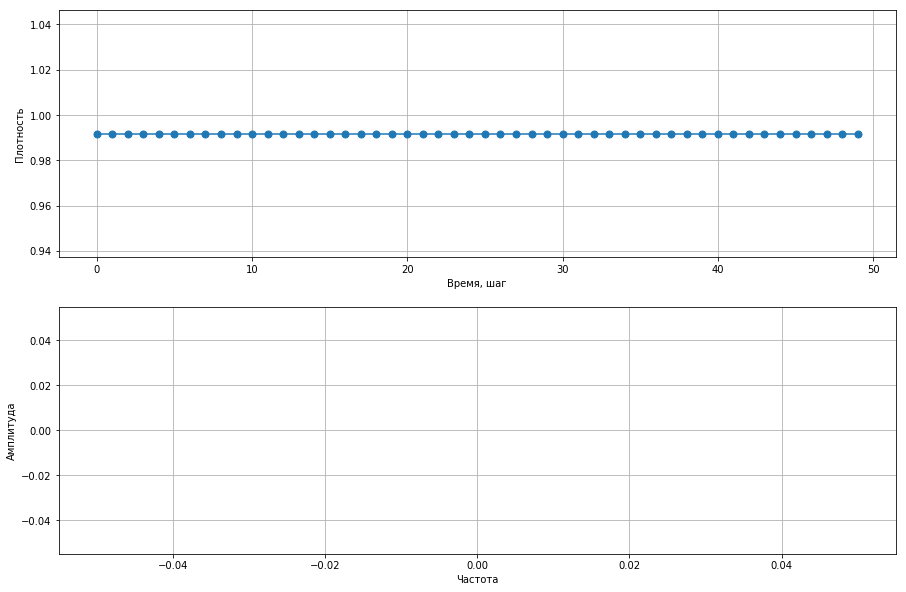

[]
*************
50 процентов


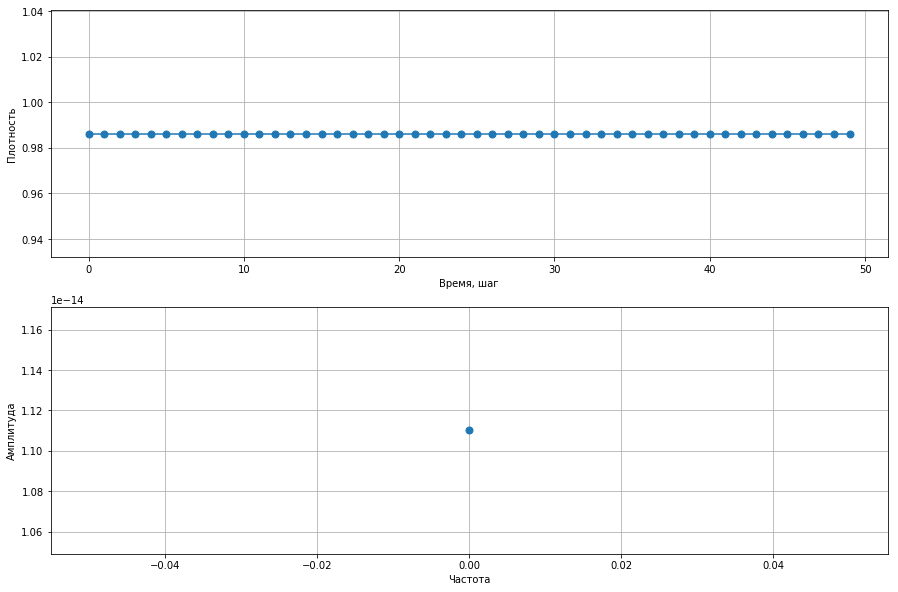

[1.11022302e-14]
*************
70 процентов


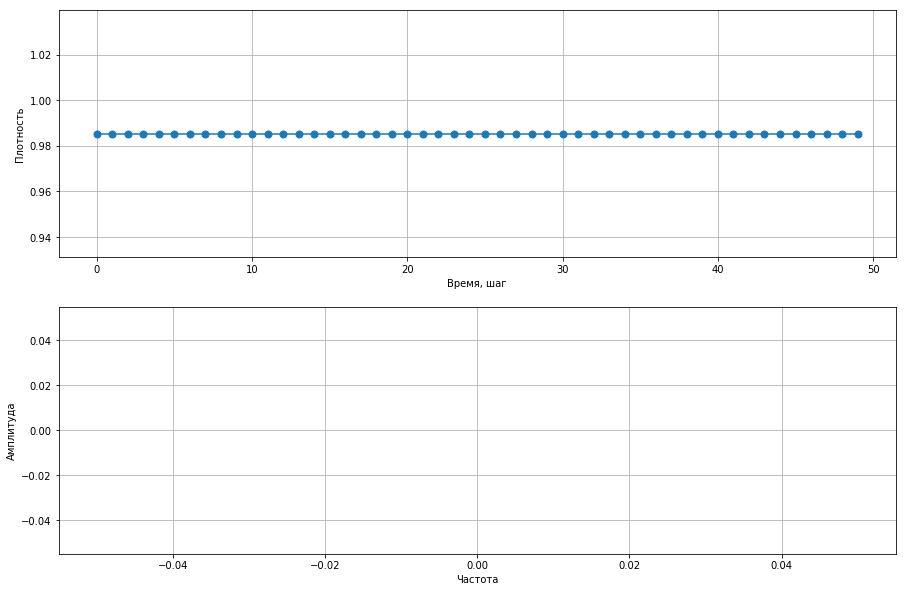

[]


In [6]:
print('21 процент')
fourier(density2133[0])
print('*************')
print('50 процентов')
fourier(density5033[0])
print('*************')
print('70 процентов')
fourier(density7033[0])

Во всех трёх случаях колебаний плотности не наблюдается

### b=5/4

21 процент


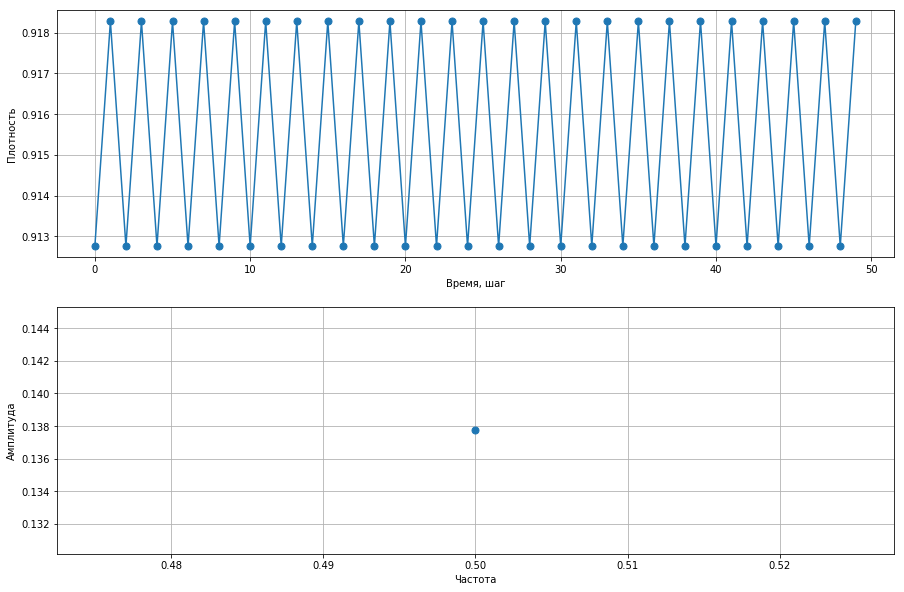

[0.13774105]
*************
50 процентов


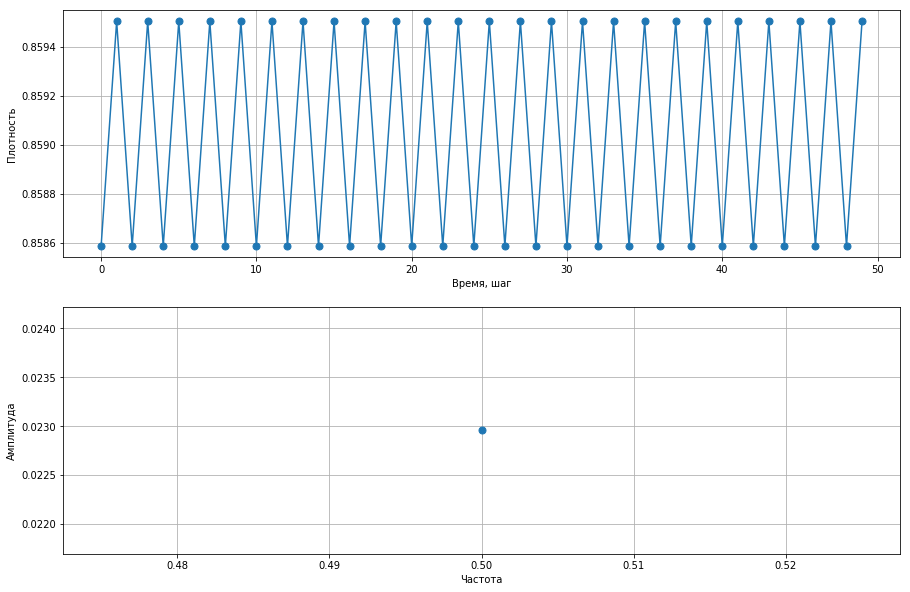

[0.02295684]
*************
70 процентов


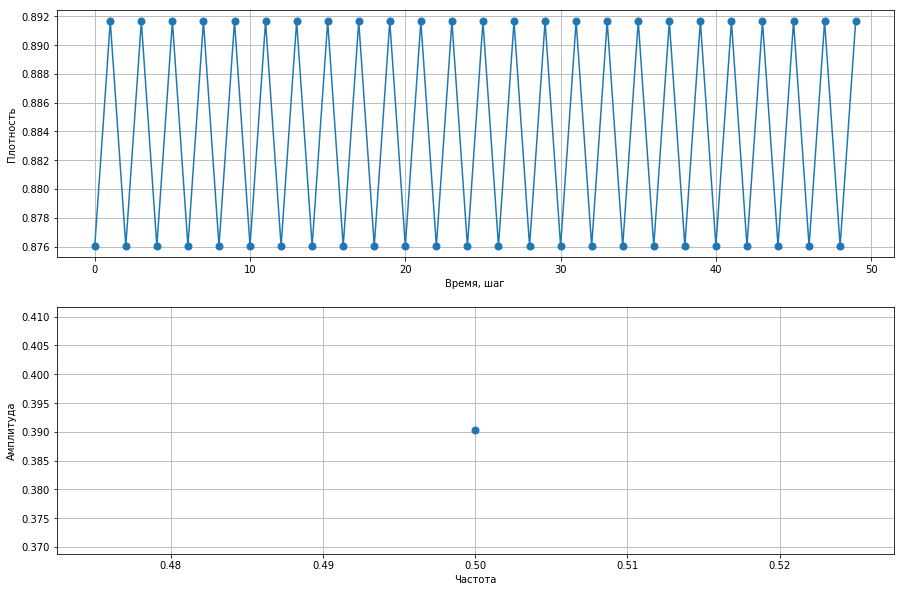

[0.3902663]


In [7]:
print('21 процент')
fourier(density2133[1])
print('*************')
print('50 процентов')
fourier(density5033[1])
print('*************')
print('70 процентов')
fourier(density7033[1])

Постоянный период

### b=4/3

21 процент


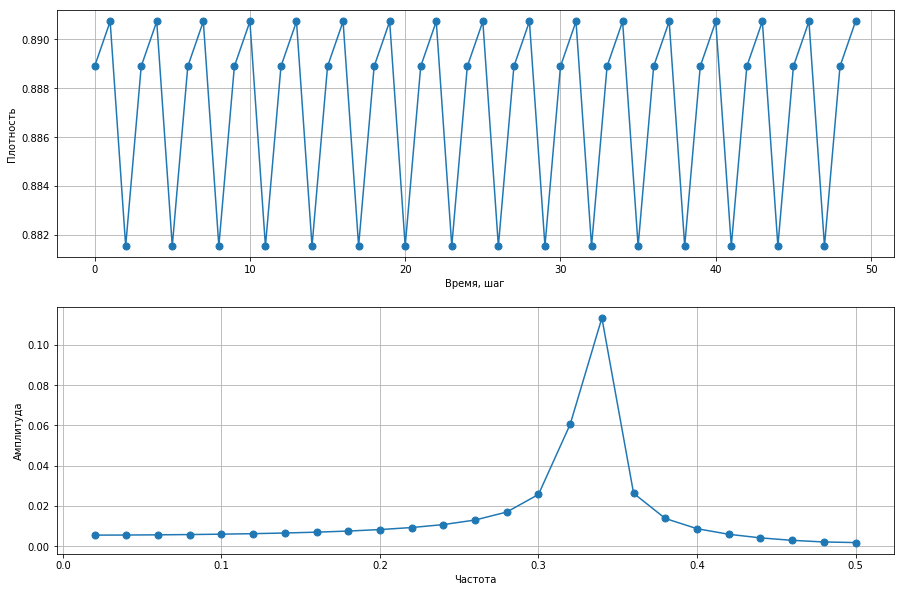

[0.00552796 0.00558368 0.00567914 0.00581853 0.0060084  0.00625853
 0.00658341 0.00700475 0.00755606 0.00829135 0.00930302 0.01076287
 0.01303009 0.01700241 0.02573112 0.06057179 0.11337714 0.02630983
 0.01380051 0.00873433 0.00595122 0.00416996 0.00294388 0.00214011
 0.00183655]
*************
50 процентов


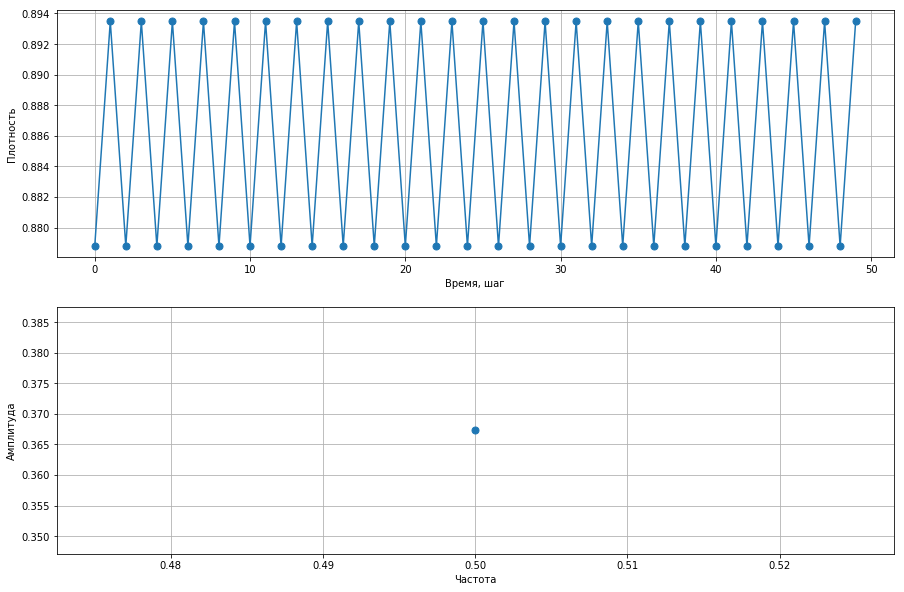

[0.36730946]
*************
70 процентов


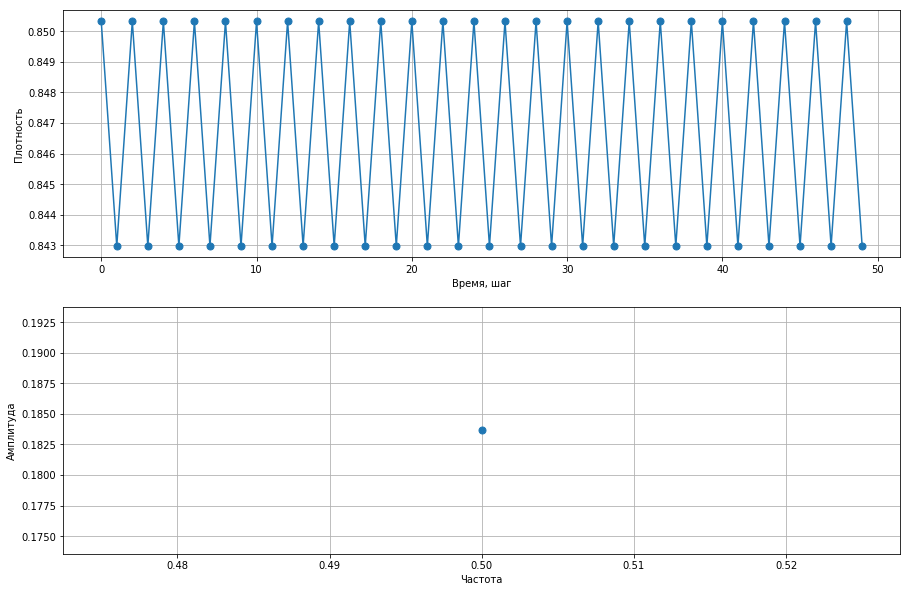

[0.18365473]


In [8]:
print('21 процент')
fourier(density2133[2])
print('*************')
print('50 процентов')
fourier(density5033[2])
print('*************')
print('70 процентов')
fourier(density7033[2])

В случае 50 и 70 процентов наблюдается постоянный период. В случае 21 процента наблюдается множество значений частот с ненулевыми амплитудами - сигнал получился более сложным.

### b=6/4

21 процент


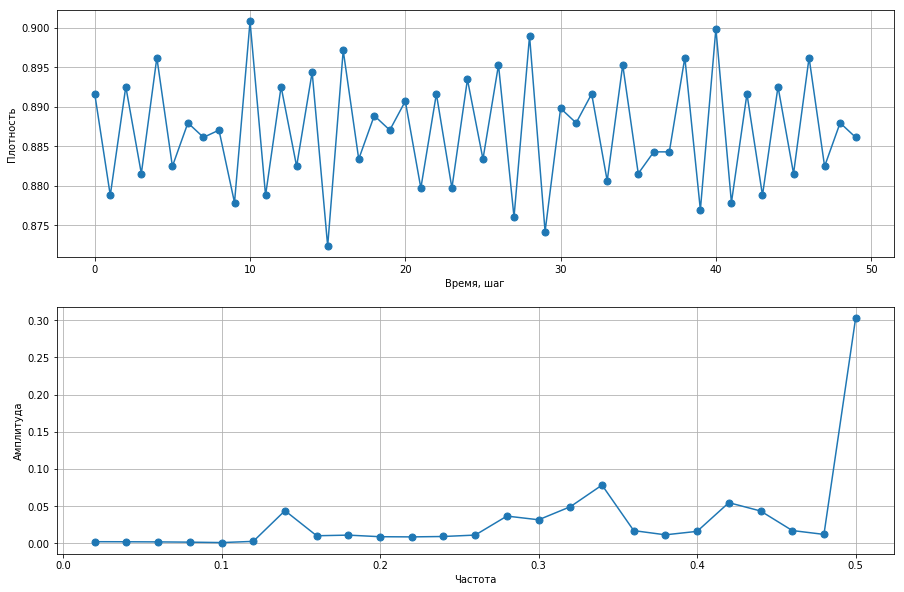

[0.00211602 0.00202766 0.00184694 0.00150365 0.00094543 0.00254594
 0.04384484 0.01011247 0.0109624  0.00882149 0.00857883 0.00911543
 0.01102191 0.03656475 0.03159635 0.04914182 0.07826518 0.01702656
 0.01137198 0.01602942 0.05460606 0.04343938 0.01713373 0.01193307
 0.3030303 ]
*************
50 процентов


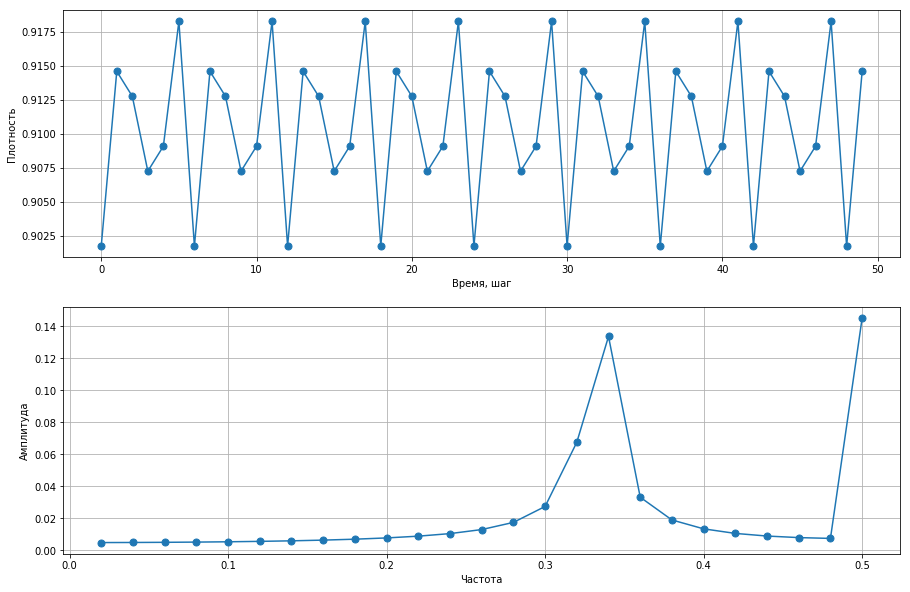

[0.00491606 0.00497268 0.0050699  0.00521235 0.00540729 0.00566562
 0.00600351 0.00644537 0.00702906 0.0078159  0.00891129 0.01051201
 0.01303088 0.01750204 0.02744586 0.06751788 0.13352738 0.0332104
 0.01902538 0.01348188 0.01062792 0.00898538 0.0080213  0.00750791
 0.14508724]
*************
70 процентов


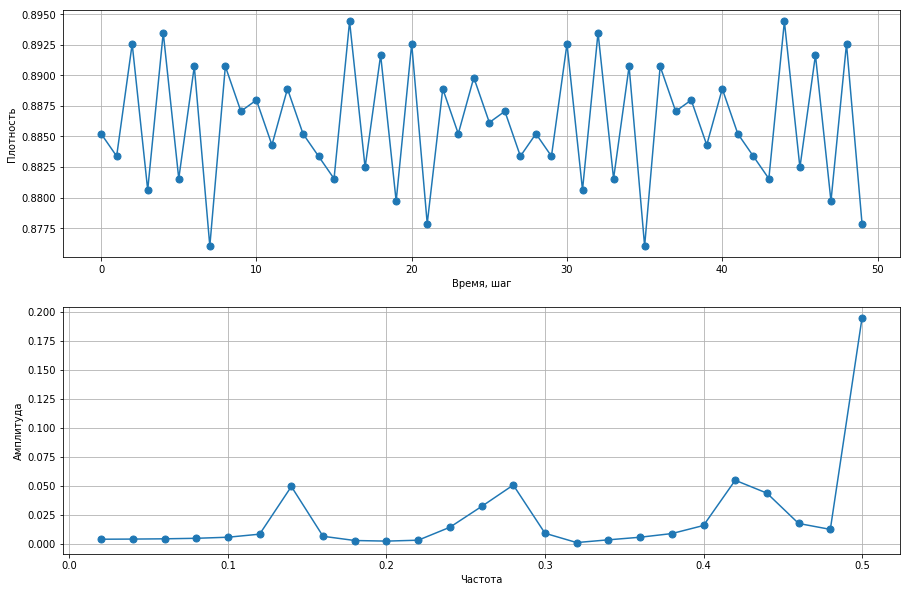

[0.00371018 0.00383041 0.00406732 0.00450976 0.00542723 0.00806812
 0.04921721 0.00624353 0.00259609 0.00207938 0.00286069 0.01402951
 0.0319622  0.0504824  0.00885879 0.00081945 0.00319027 0.00542971
 0.0085821  0.01555308 0.05458169 0.04348125 0.01729383 0.01219823
 0.19467401]


In [9]:
print('21 процент')
fourier(density2133[3])
print('*************')
print('50 процентов')
fourier(density5033[3])
print('*************')
print('70 процентов')
fourier(density7033[3])

### b=5/3

21 процент


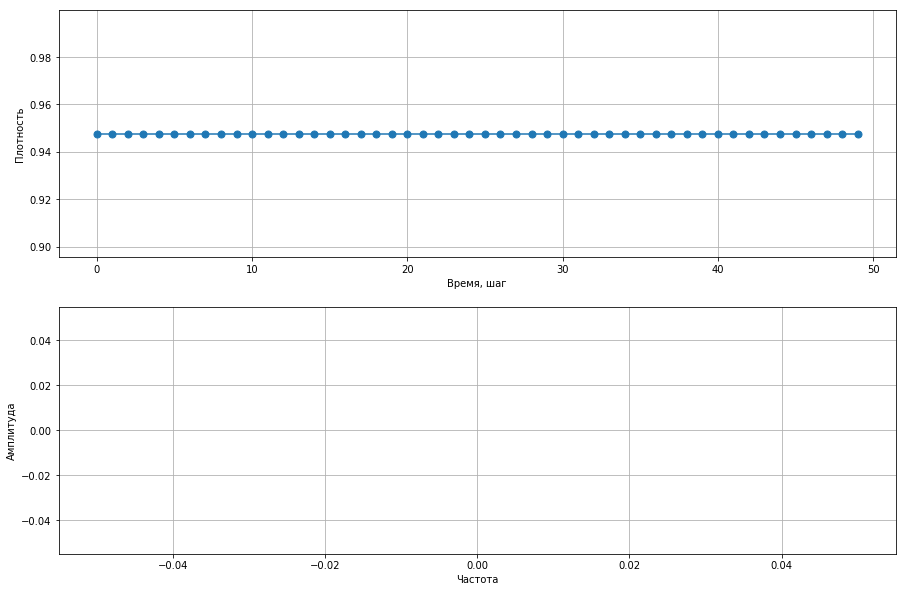

[]
*************
50 процентов


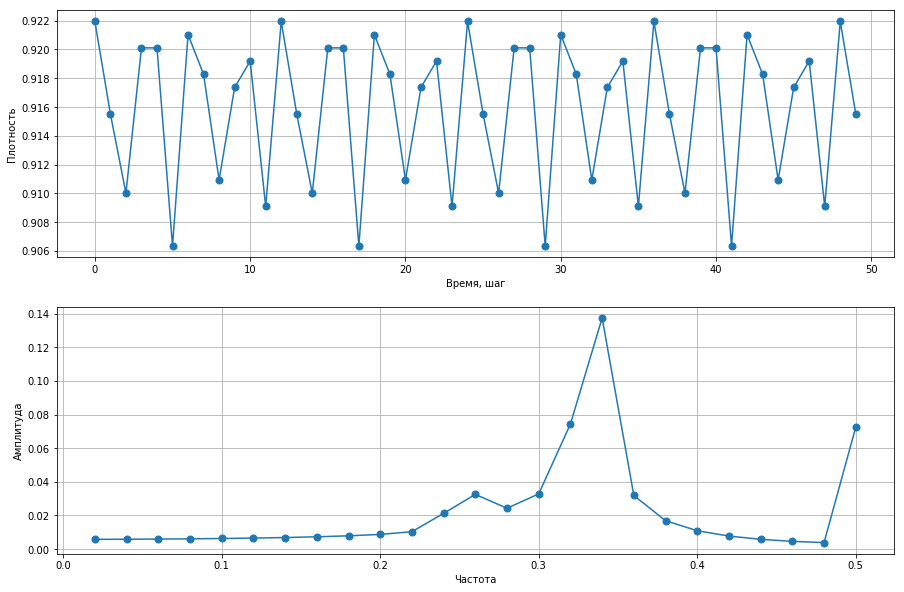

[0.00583455 0.00589173 0.00598959 0.00613229 0.00632632 0.00658148
 0.00691268 0.00734387 0.00791916 0.00874943 0.0103609  0.02127751
 0.03253713 0.02430195 0.03284721 0.07439039 0.13738064 0.03187931
 0.01690411 0.01095077 0.00777517 0.00584068 0.00461575 0.0039086
 0.07254362]
*************
70 процентов


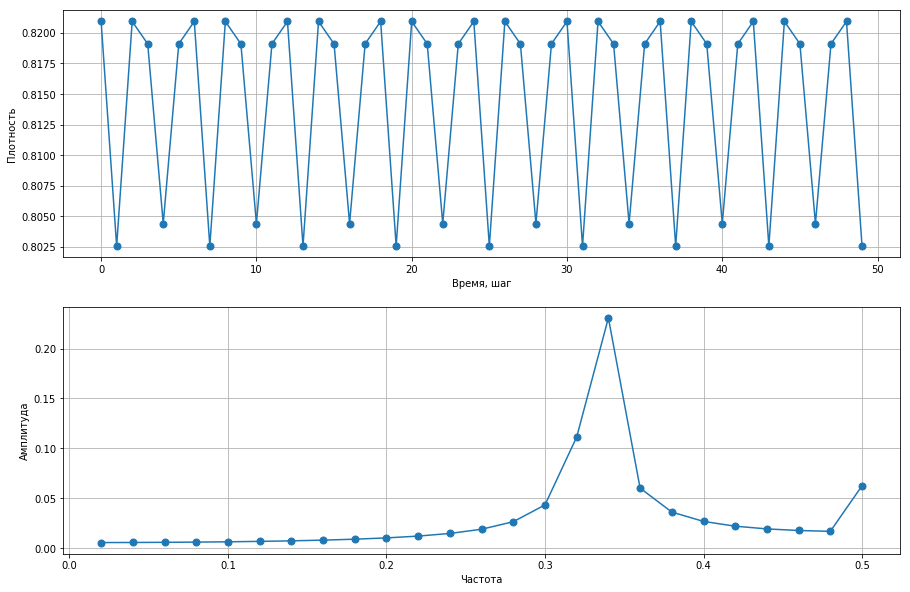

[0.00553876 0.00562751 0.00578025 0.00600481 0.00631349 0.00672471
 0.00726595 0.00797861 0.00892703 0.01021544 0.01202311 0.01468479
 0.01890275 0.02643624 0.04327329 0.11134982 0.23067826 0.06013843
 0.0360943  0.02674436 0.02196204 0.01922968 0.01763713 0.01679377
 0.06244261]


In [10]:
print('21 процент')
fourier(density2133[4])
print('*************')
print('50 процентов')
fourier(density5033[4])
print('*************')
print('70 процентов')
fourier(density7033[4])

### b=7/4

21 процент


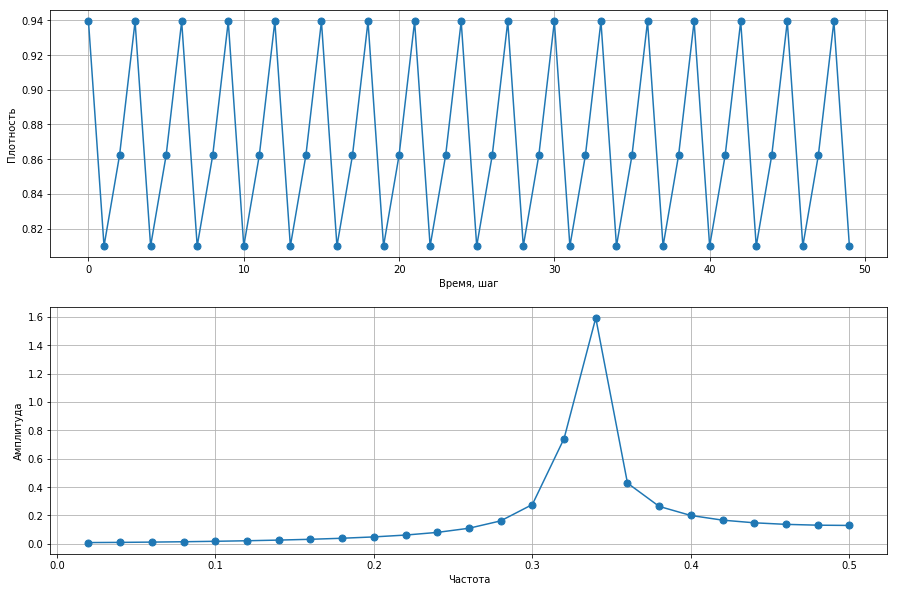

[0.00872782 0.01003298 0.01202166 0.01459284 0.01773923 0.0215406
 0.0261636  0.03188342 0.03913811 0.04864135 0.06162053 0.08036453
 0.10967078 0.16155055 0.27687711 0.74187483 1.5922184  0.42797683
 0.26363825 0.19962926 0.16683244 0.14806304 0.13710822 0.13130117
 0.12947658]
*************
50 процентов


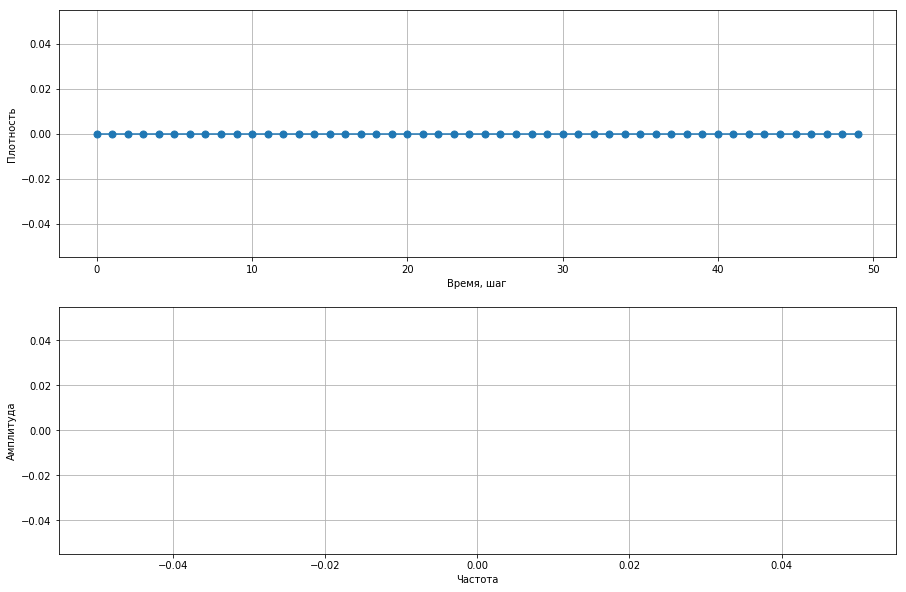

[]
*************
70 процентов


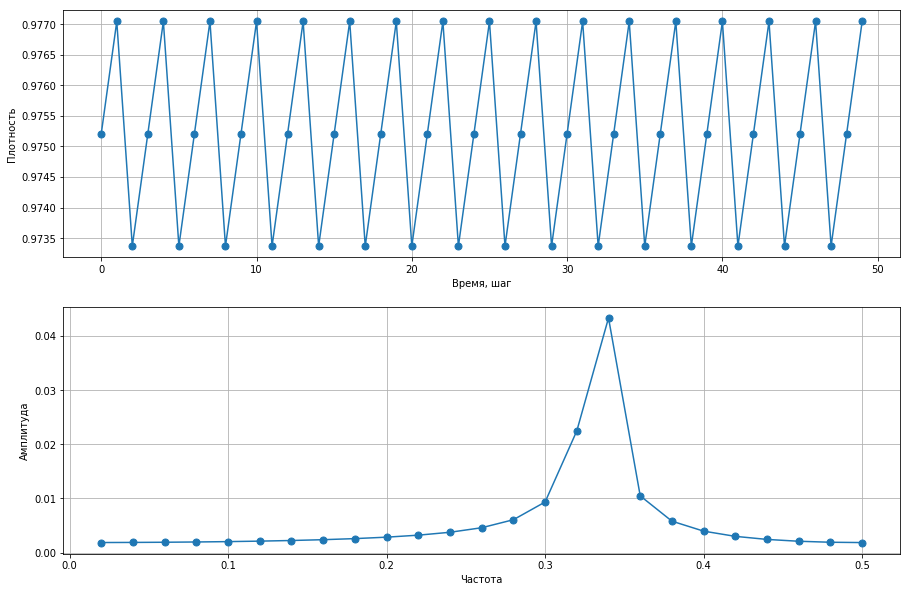

[0.00184301 0.00186269 0.00189644 0.00194581 0.0020132  0.00210223
 0.00221827 0.00236938 0.00256805 0.00283446 0.00320325 0.00373898
 0.00457695 0.00605586 0.00932821 0.0224646  0.04332075 0.01045971
 0.00578973 0.00394667 0.00298344 0.00241817 0.00207917 0.00189517
 0.00183655]


In [11]:
print('21 процент')
fourier(density2133[5])
print('*************')
print('50 процентов')
fourier(density5033[5])
print('*************')
print('70 процентов')
fourier(density7033[5])

При 50 процентах кооператоры исчезают

### b=2

21 процент


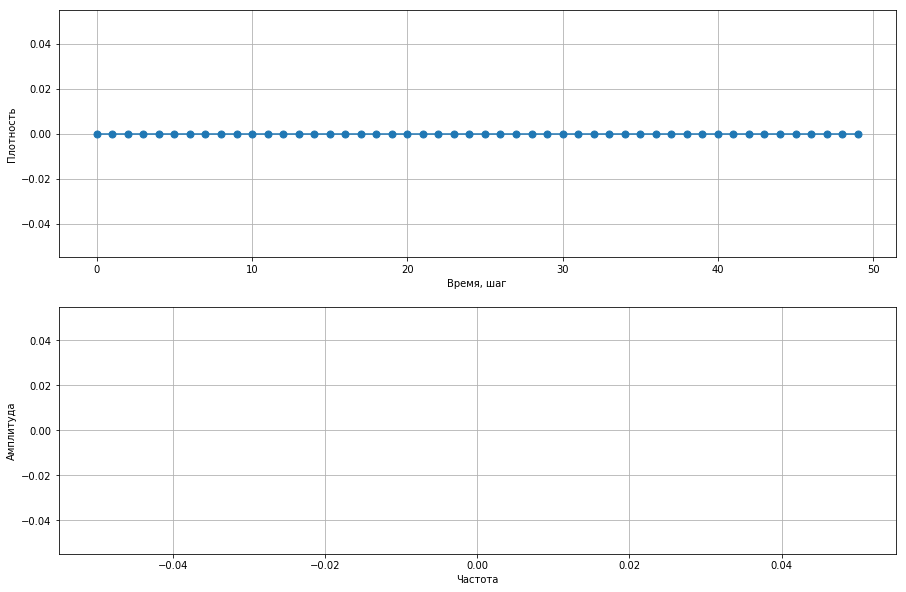

[]
*************
50 процентов


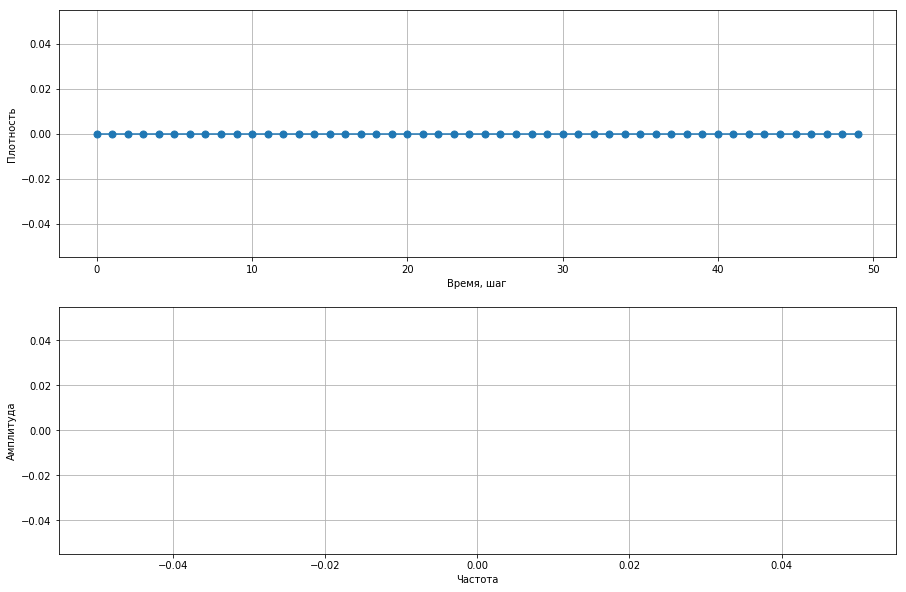

[]
*************
70 процентов


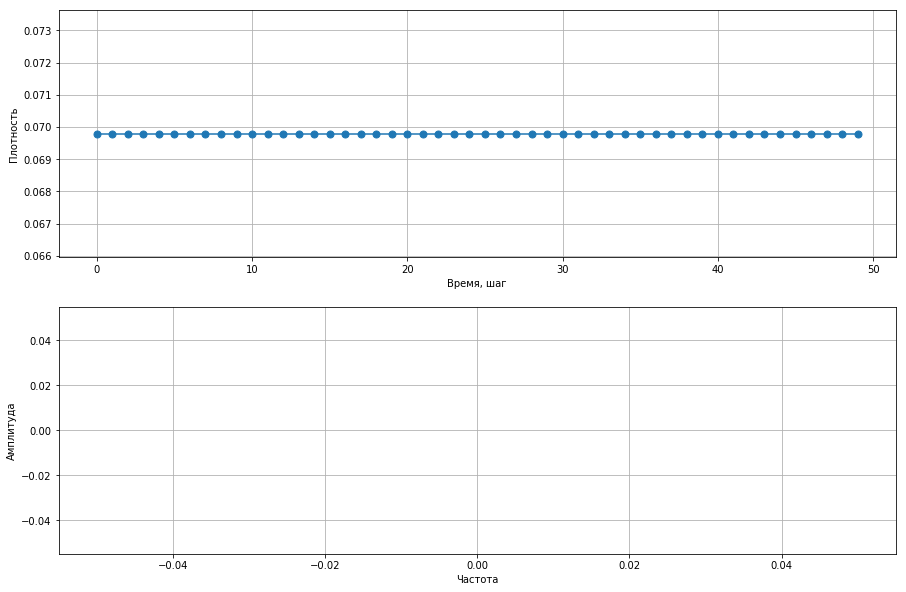

[]


In [12]:
print('21 процент')
fourier(density2133[6])
print('*************')
print('50 процентов')
fourier(density5033[6])
print('*************')
print('70 процентов')
fourier(density7033[6])

### b=7/3

21 процент


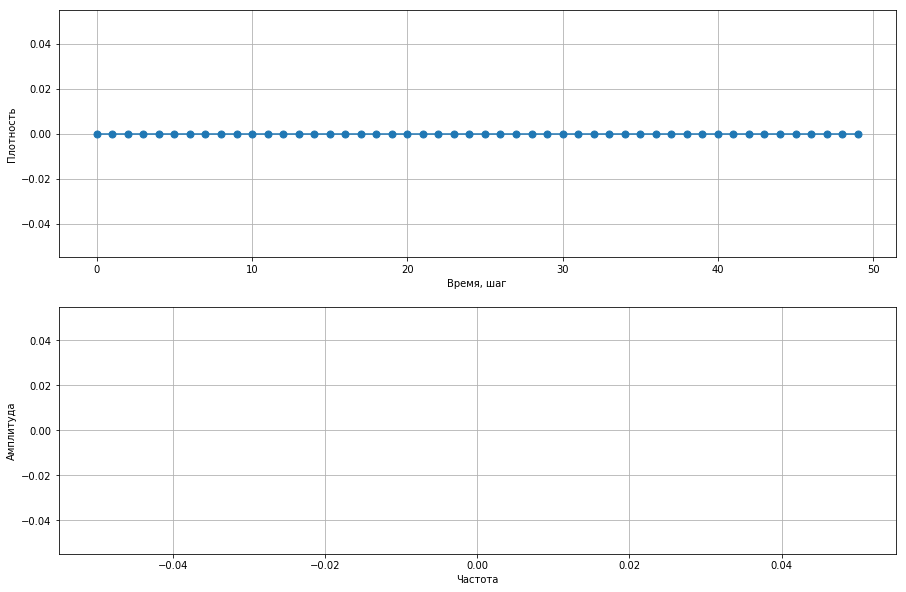

[]
*************
50 процентов


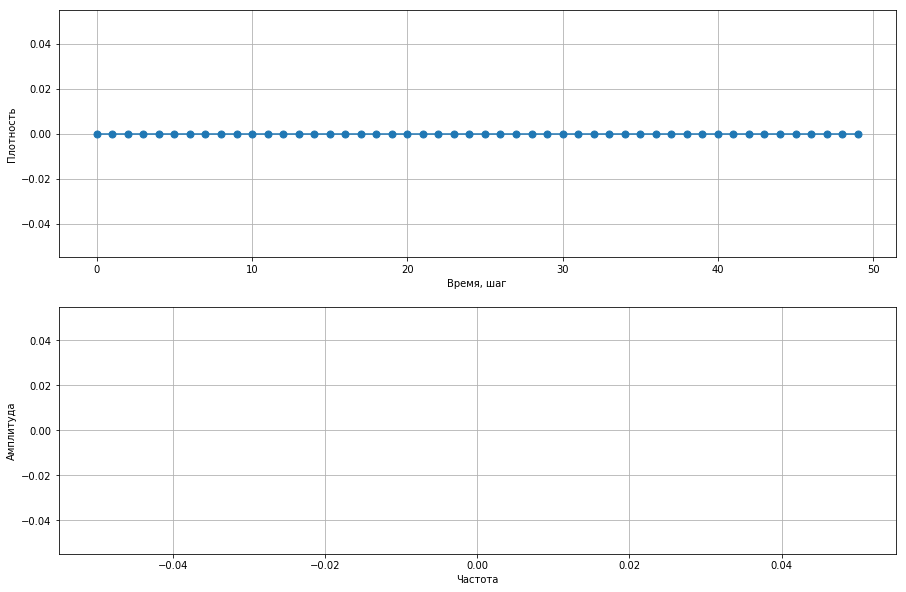

[]
*************
70 процентов


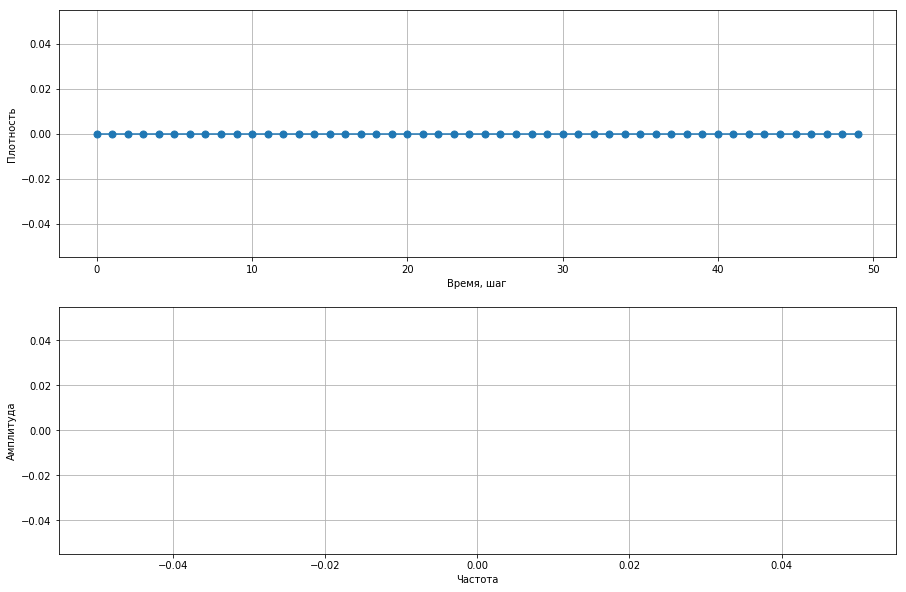

[]


In [13]:
print('21 процент')
fourier(density2133[7])
print('*************')
print('50 процентов')
fourier(density5033[7])
print('*************')
print('70 процентов')
fourier(density7033[7])

при таком значении b кооператоров нет нигде

Вывод: результаты зависят от начального количества кооператоров

## Сравнение двух полей

### Поле 72x72 сравнивается с полем 33x33, b=7/3 

21 процент


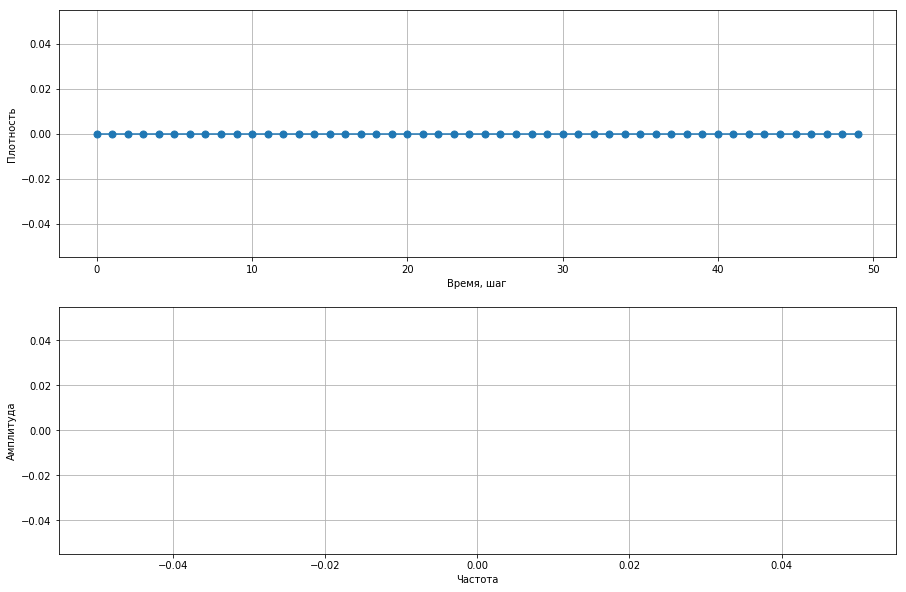

[]
*************
50 процентов


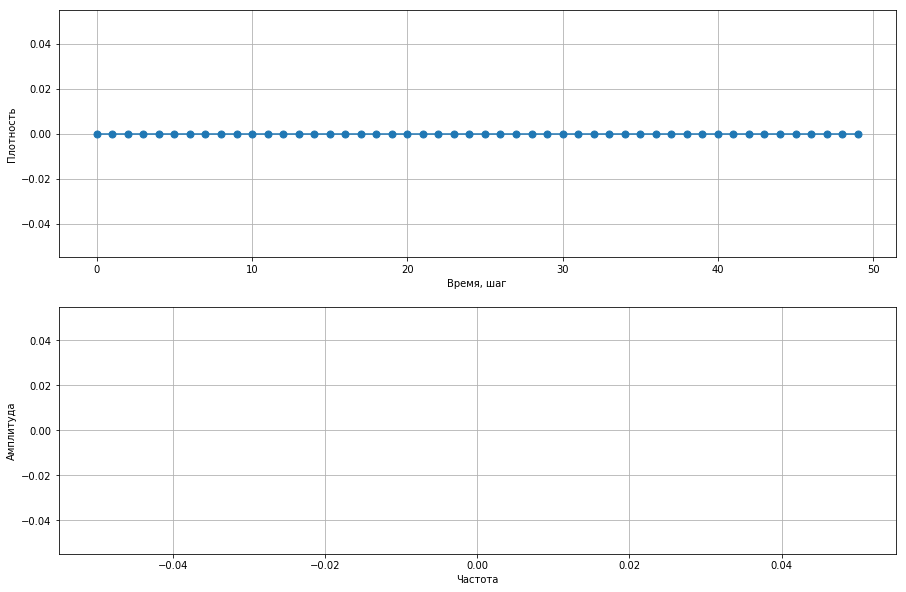

[]
*************
70 процентов


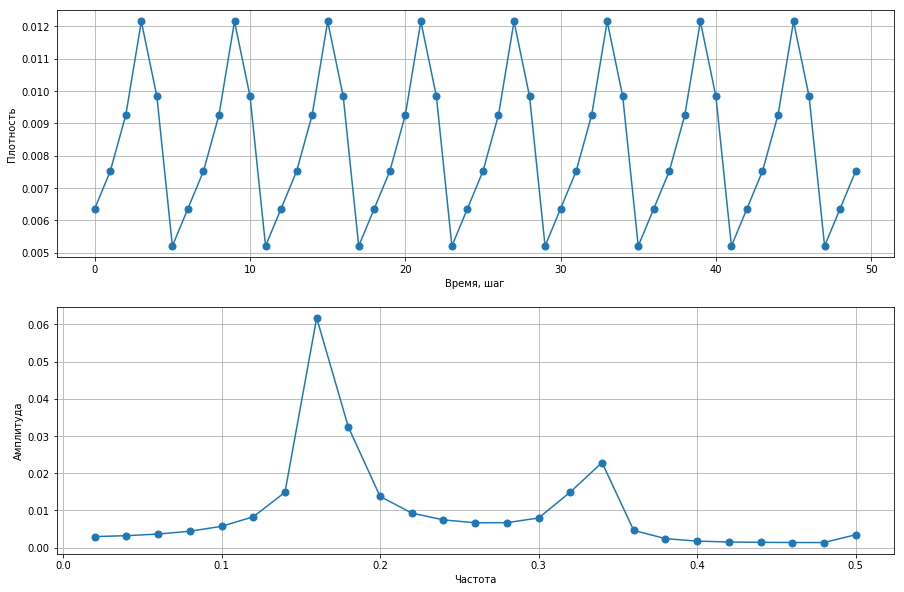

[0.00296804 0.00320442 0.00364795 0.00440365 0.00571895 0.00828311
 0.01487822 0.06176112 0.03240022 0.01376647 0.00928361 0.00744901
 0.00668941 0.00670905 0.007963   0.014934   0.02287635 0.00463776
 0.00240844 0.00174664 0.00150952 0.00141469 0.0013734  0.00135543
 0.00347222]


In [14]:
print('21 процент')
fourier(density2172[7])
print('*************')
print('50 процентов')
fourier(density5072[7])
print('*************')
print('70 процентов')
fourier(density7072[7])

При сравнении поля 72x72 c полем 33x33 для b=7/3 выяснилось, что есть разница для начального процента кооператоров=70

### Поле 15x15 сравнивается с полем 33x33, b=7/3 

21 процент


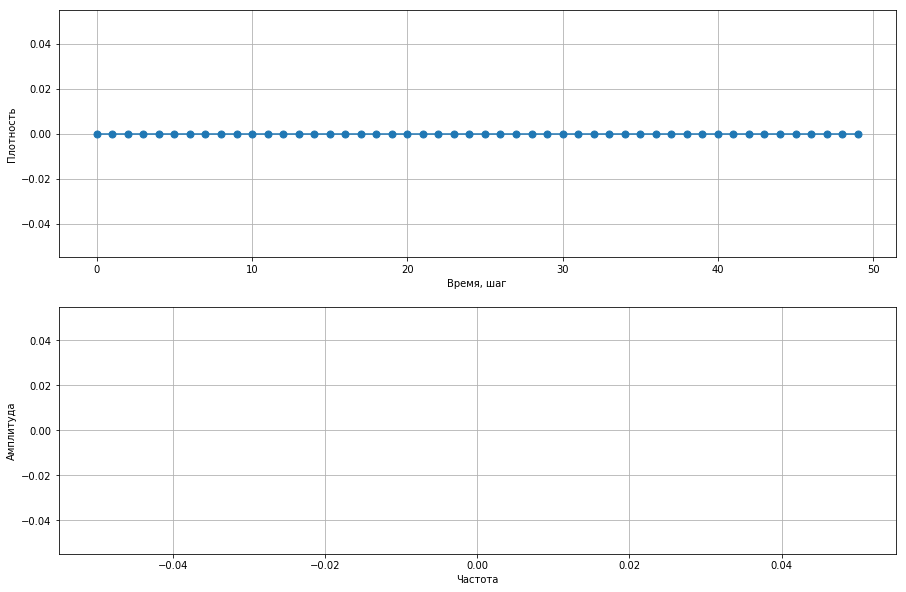

[]
*************
50 процентов


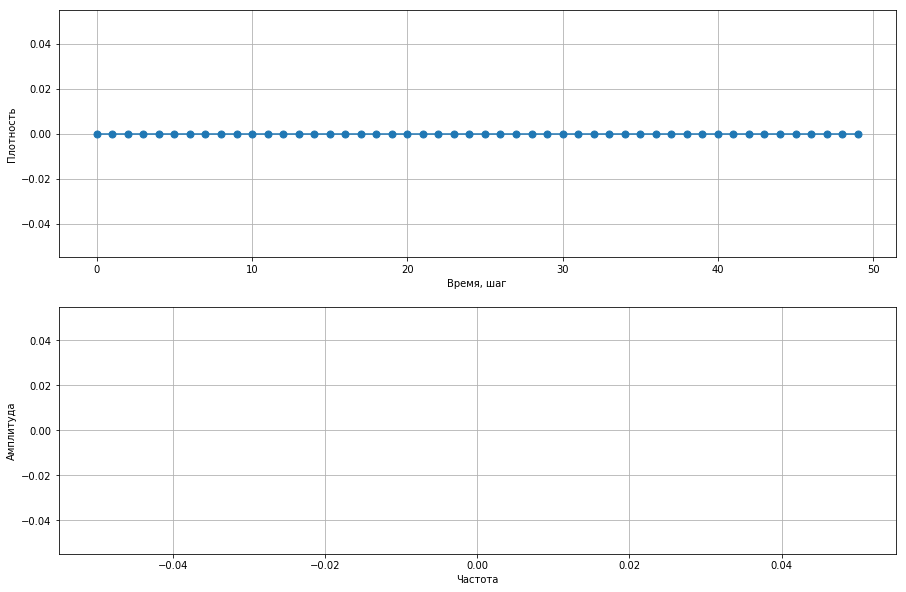

[]
*************
70 процентов


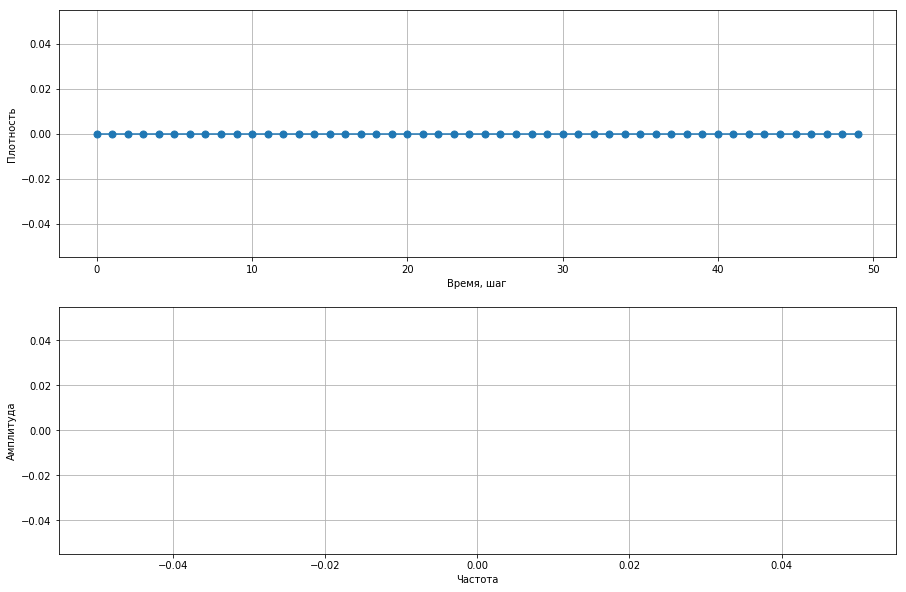

[]


In [15]:
print('21 процент')
fourier(density2115[7])
print('*************')
print('50 процентов')
fourier(density5015[7])
print('*************')
print('70 процентов')
fourier(density7015[7])

Ненулевое значение плотности для 70 процентов появилось только при большом размере поля

Результат зависит от размера поля

## Разные seed

In [16]:
seed1 = c_density(size=33, percentage=21, burnin=5000,seed=1)
seed4= c_density(size=33, percentage=21, burnin=5000,seed=4)
seed12 = c_density(size=33, percentage=21, burnin=5000,seed=12)

### b=1

seed=1


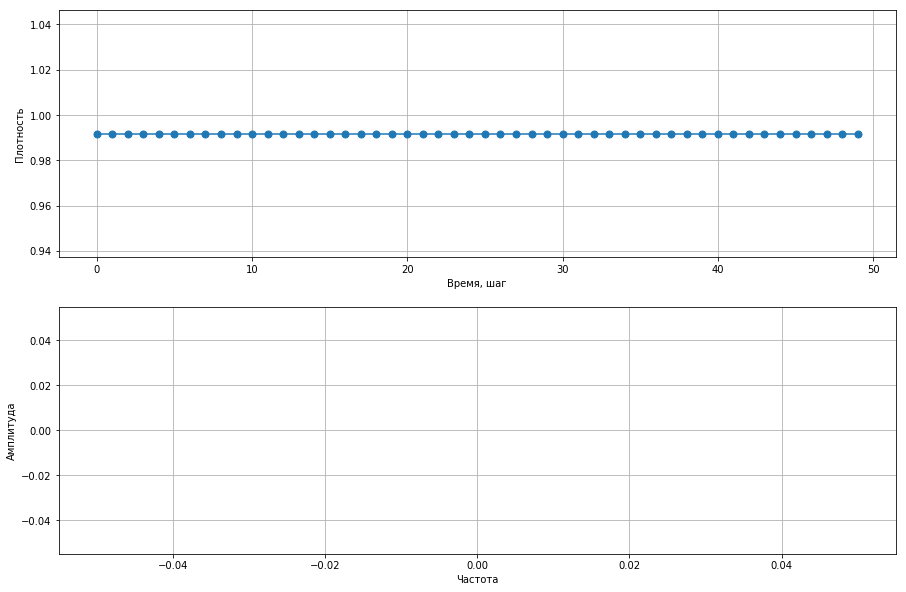

[]
*************
seed=4


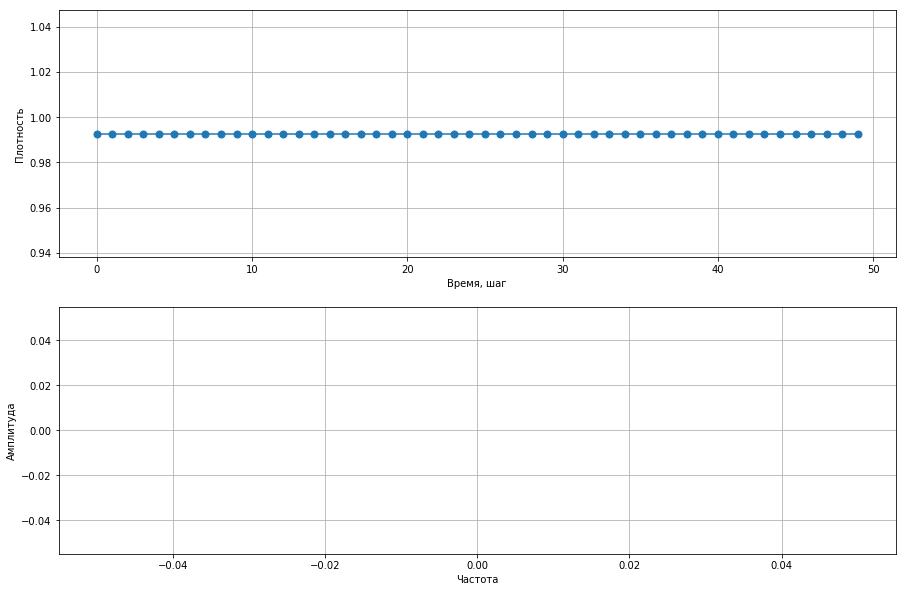

[]
*************
seed=12


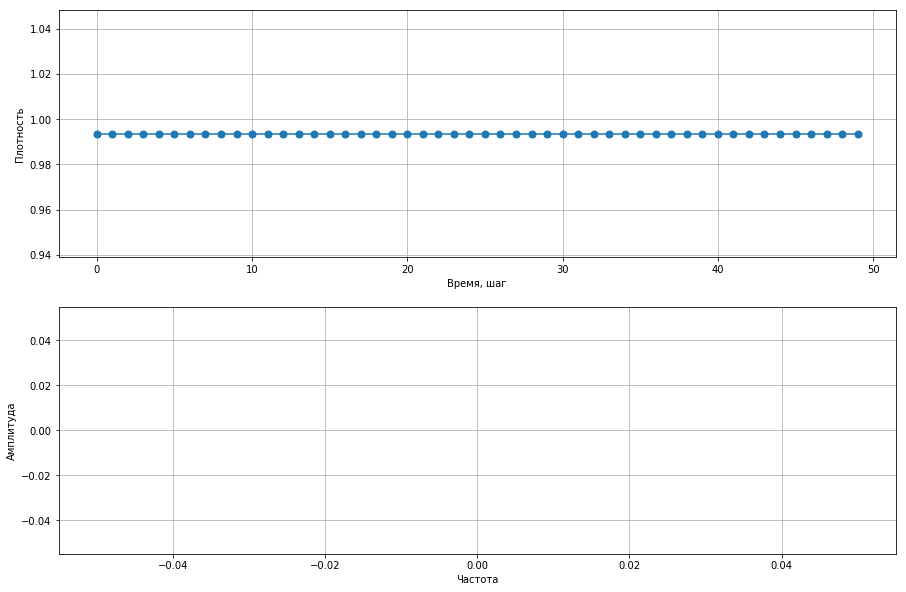

[]


In [17]:
print('seed=1')
fourier(seed1[0])
print('*************')
print('seed=4')
fourier(seed4[0])
print('*************')
print('seed=12')
fourier(seed12[0])

### b=5/4

seed=1


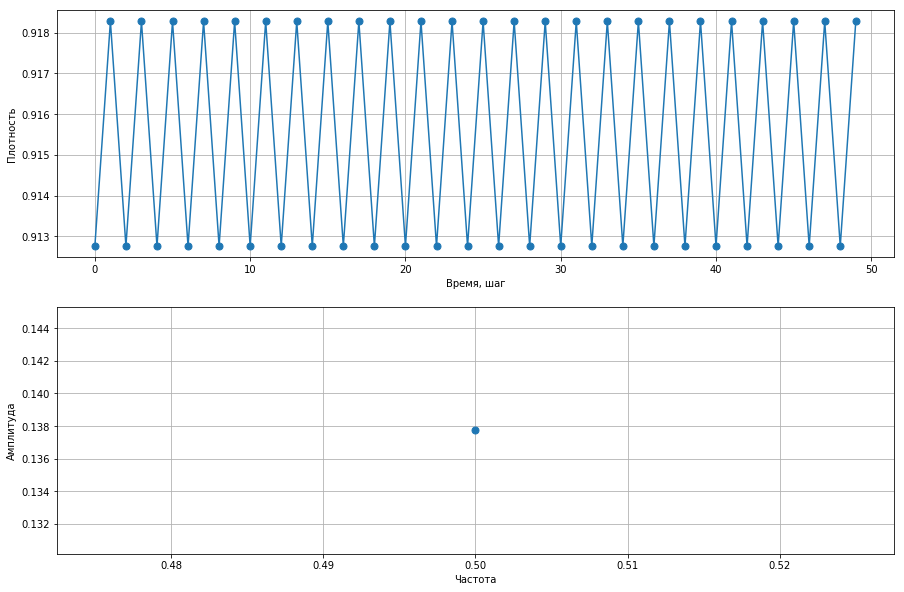

[0.13774105]
*************
seed=4


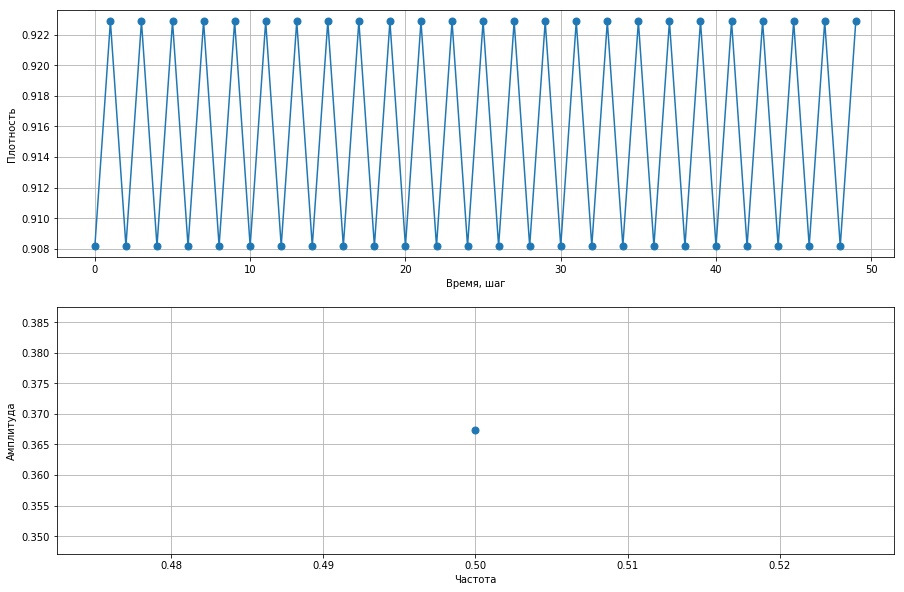

[0.36730946]
*************
seed=12


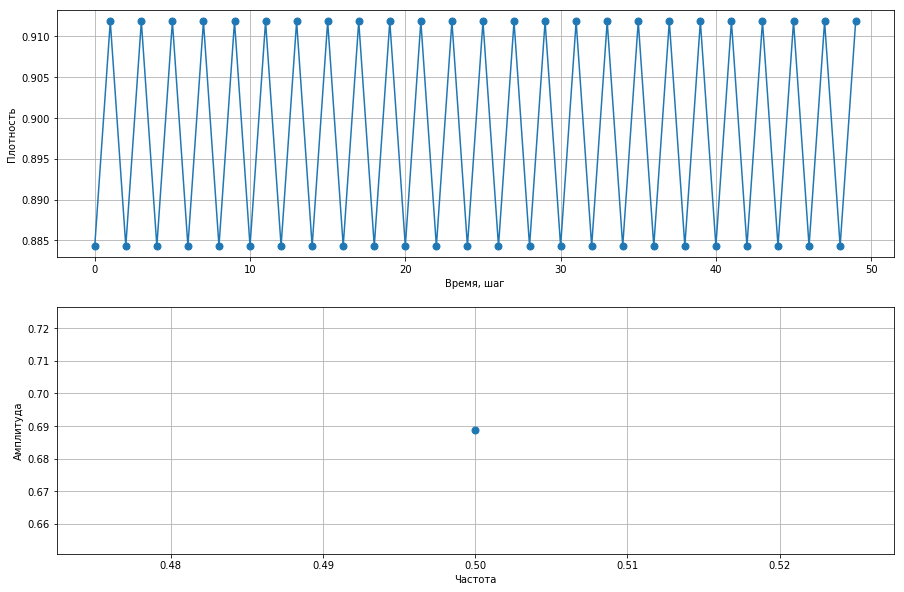

[0.68870523]


In [18]:
print('seed=1')
fourier(seed1[1])
print('*************')
print('seed=4')
fourier(seed4[1])
print('*************')
print('seed=12')
fourier(seed12[1])

### b=4/3

seed=1


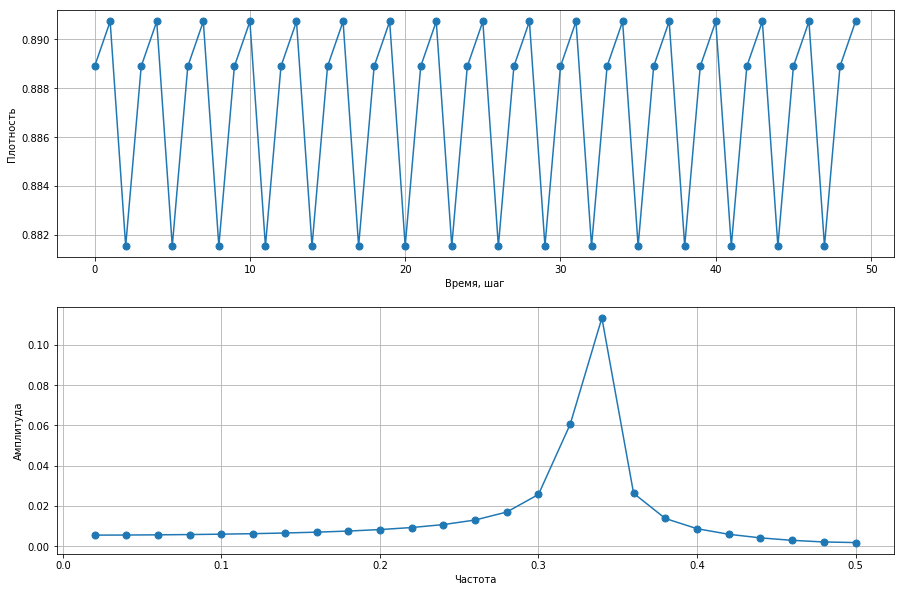

[0.00552796 0.00558368 0.00567914 0.00581853 0.0060084  0.00625853
 0.00658341 0.00700475 0.00755606 0.00829135 0.00930302 0.01076287
 0.01303009 0.01700241 0.02573112 0.06057179 0.11337714 0.02630983
 0.01380051 0.00873433 0.00595122 0.00416996 0.00294388 0.00214011
 0.00183655]
*************
seed=4


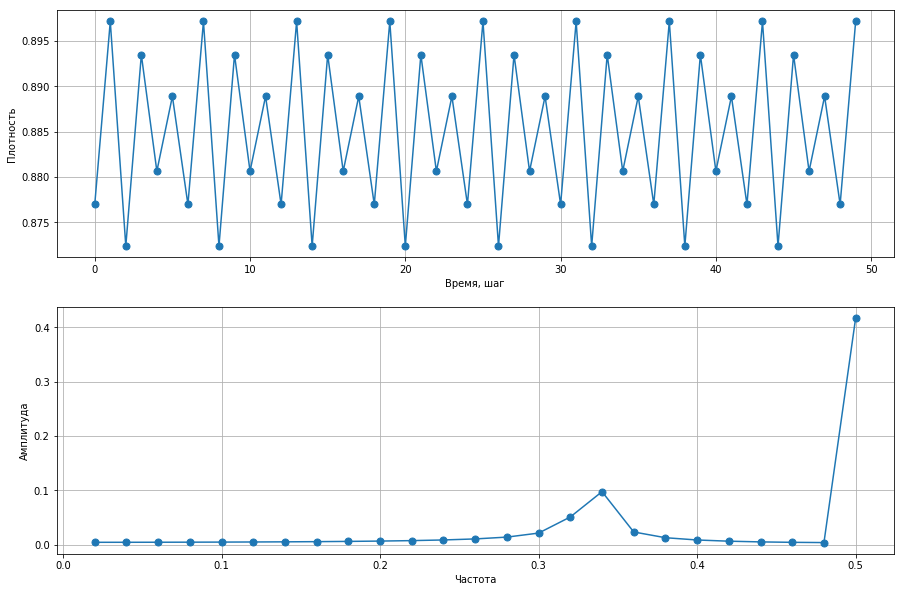

[0.00430012 0.00434526 0.00442267 0.00453584 0.00469023 0.00489406
 0.00515945 0.00550467 0.00595797 0.00656495 0.00740384 0.00862039
 0.01051983 0.01386606 0.02125782 0.05089168 0.09741063 0.02329914
 0.01274437 0.0085596  0.00635542 0.00504717 0.0042516  0.00381382
 0.41689624]
*************
seed=12


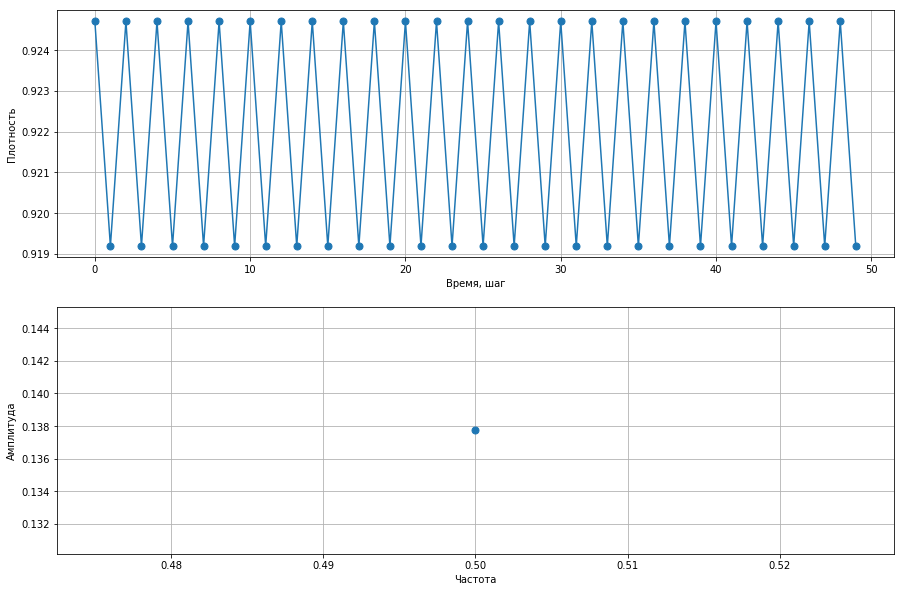

[0.13774105]


In [19]:
print('seed=1')
fourier(seed1[2])
print('*************')
print('seed=4')
fourier(seed4[2])
print('*************')
print('seed=12')
fourier(seed12[2])

### b=6/4

seed=1


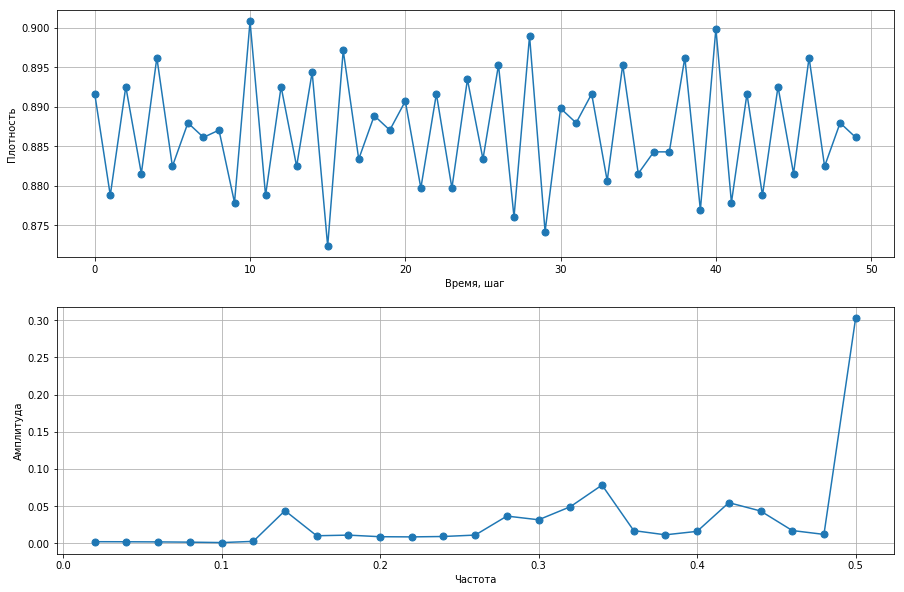

[0.00211602 0.00202766 0.00184694 0.00150365 0.00094543 0.00254594
 0.04384484 0.01011247 0.0109624  0.00882149 0.00857883 0.00911543
 0.01102191 0.03656475 0.03159635 0.04914182 0.07826518 0.01702656
 0.01137198 0.01602942 0.05460606 0.04343938 0.01713373 0.01193307
 0.3030303 ]
*************
seed=4


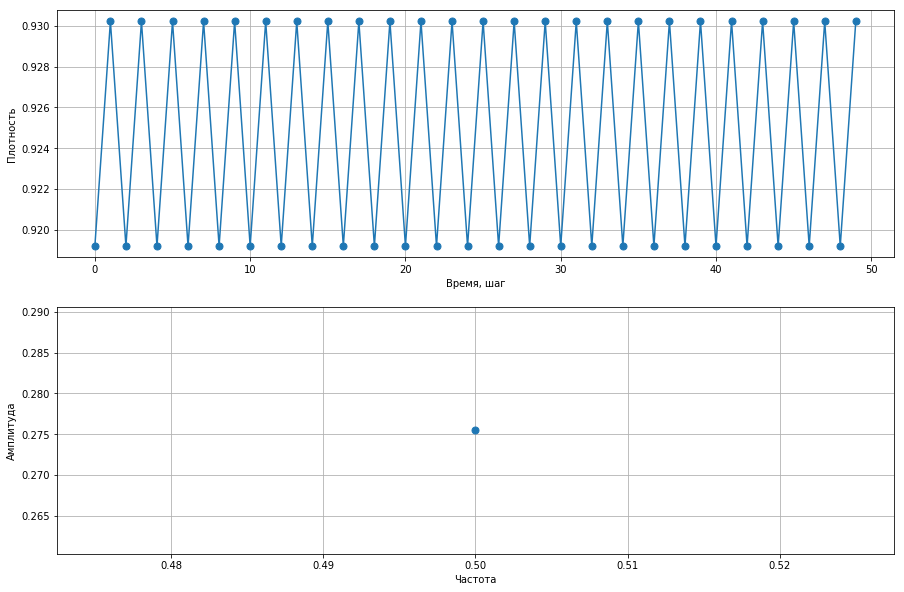

[0.27548209]
*************
seed=12


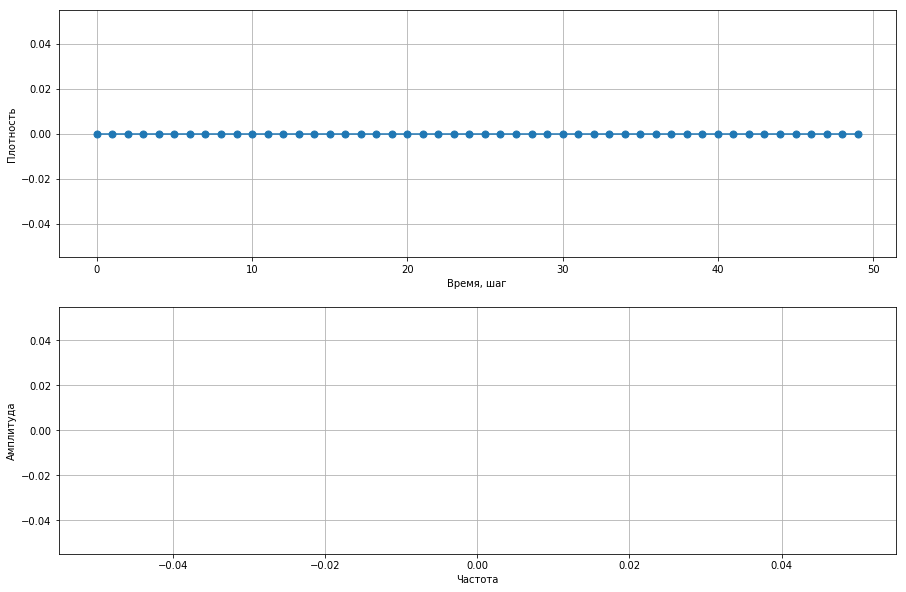

[]


In [20]:
print('seed=1')
fourier(seed1[3])
print('*************')
print('seed=4')
fourier(seed4[3])
print('*************')
print('seed=12')
fourier(seed12[3])

### b=5/3

seed=1


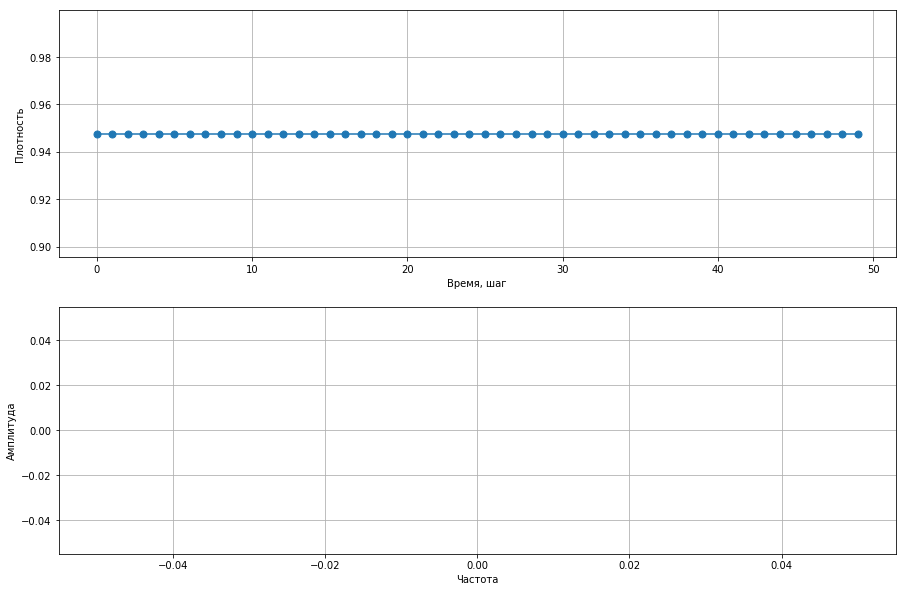

[]
*************
seed=4


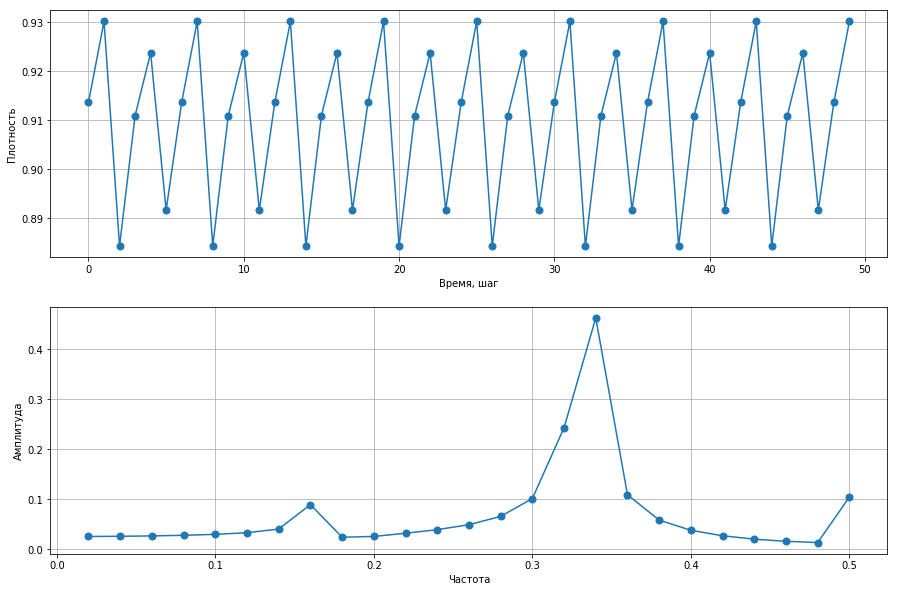

[0.02584578 0.02626281 0.02701316 0.0282085  0.03009989 0.03336448
 0.04073017 0.08950947 0.02429921 0.02594093 0.03233776 0.03949569
 0.04941026 0.06596455 0.10164485 0.243133   0.46242847 0.10925301
 0.05860629 0.03824867 0.02727378 0.02052144 0.0162066  0.01369606
 0.1046832 ]
*************
seed=12


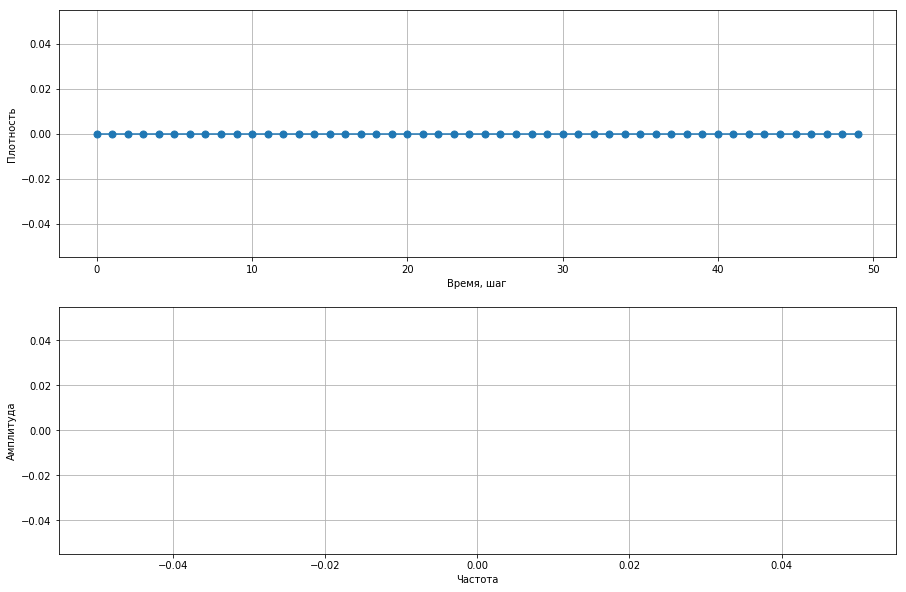

[]


In [21]:
print('seed=1')
fourier(seed1[4])
print('*************')
print('seed=4')
fourier(seed4[4])
print('*************')
print('seed=12')
fourier(seed12[4])

### b=7/4

seed=1


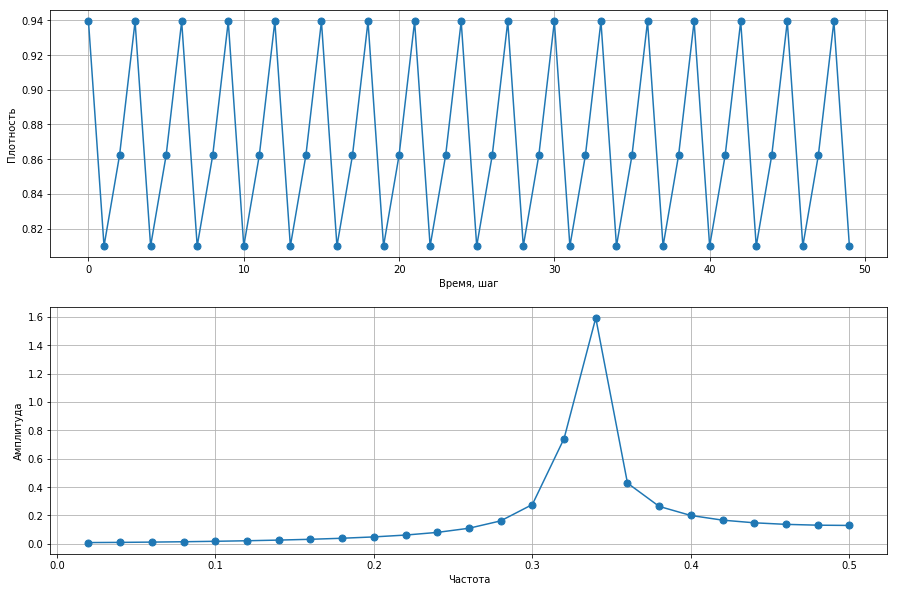

[0.00872782 0.01003298 0.01202166 0.01459284 0.01773923 0.0215406
 0.0261636  0.03188342 0.03913811 0.04864135 0.06162053 0.08036453
 0.10967078 0.16155055 0.27687711 0.74187483 1.5922184  0.42797683
 0.26363825 0.19962926 0.16683244 0.14806304 0.13710822 0.13130117
 0.12947658]
*************
seed=4


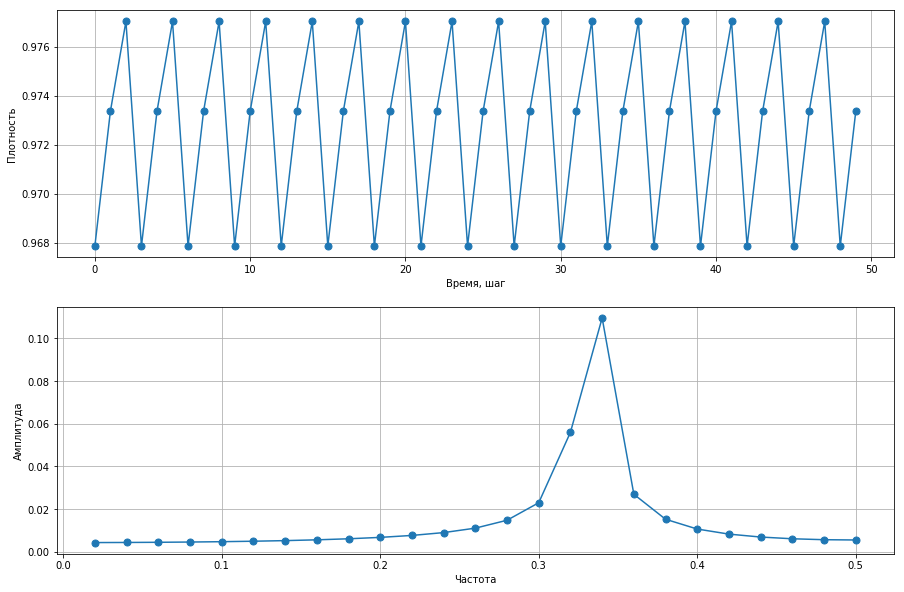

[0.00430099 0.0043488  0.00443085 0.00455098 0.00471522 0.00493255
 0.00521639 0.0055869  0.00607534 0.00673232 0.00764477 0.0089749
 0.01106289 0.01476075 0.02296847 0.05599623 0.10959567 0.02693746
 0.01522959 0.01063967 0.0082658  0.00689191 0.00608081 0.00564676
 0.00550964]
*************
seed=12


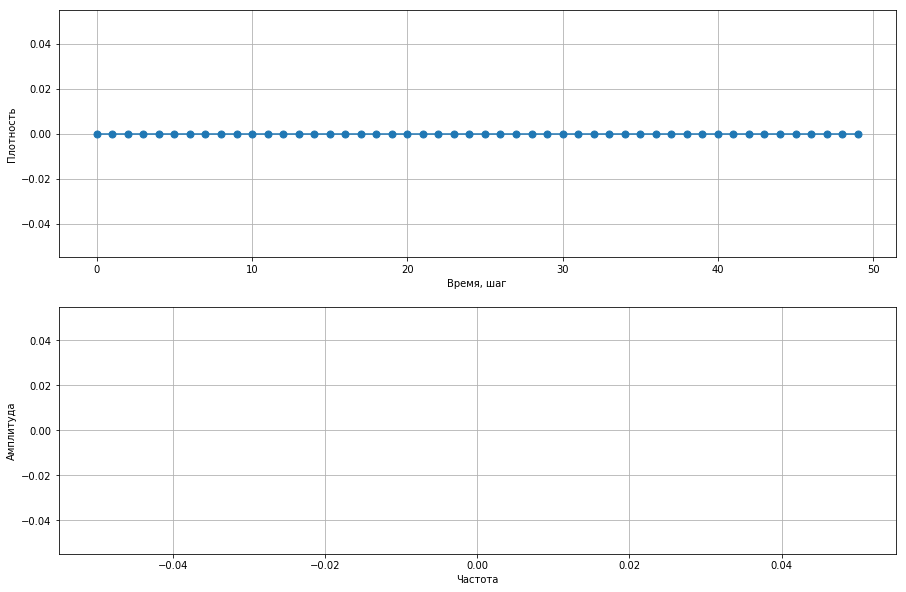

[]


In [22]:
print('seed=1')
fourier(seed1[5])
print('*************')
print('seed=4')
fourier(seed4[5])
print('*************')
print('seed=12')
fourier(seed12[5])

### b=2

seed=1


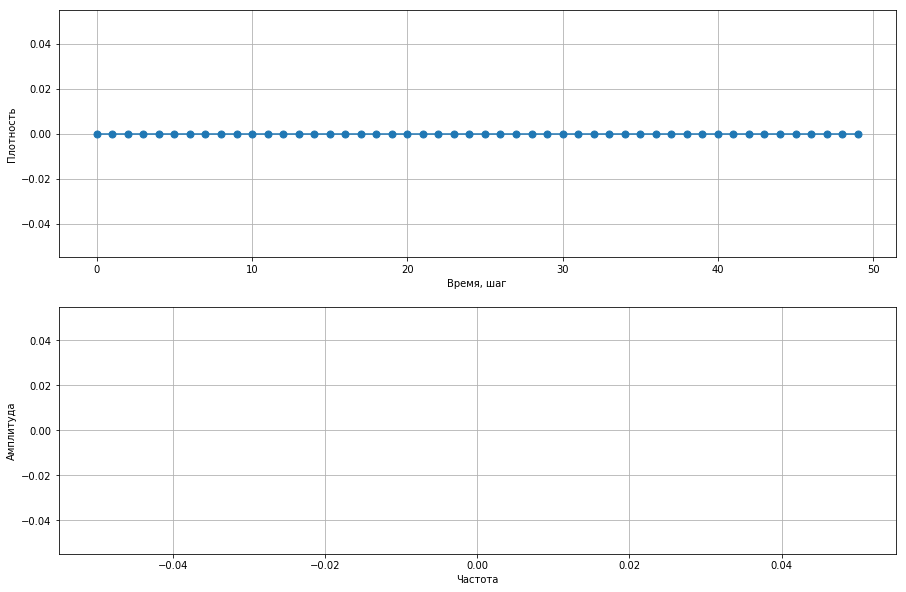

[]
*************
seed=4


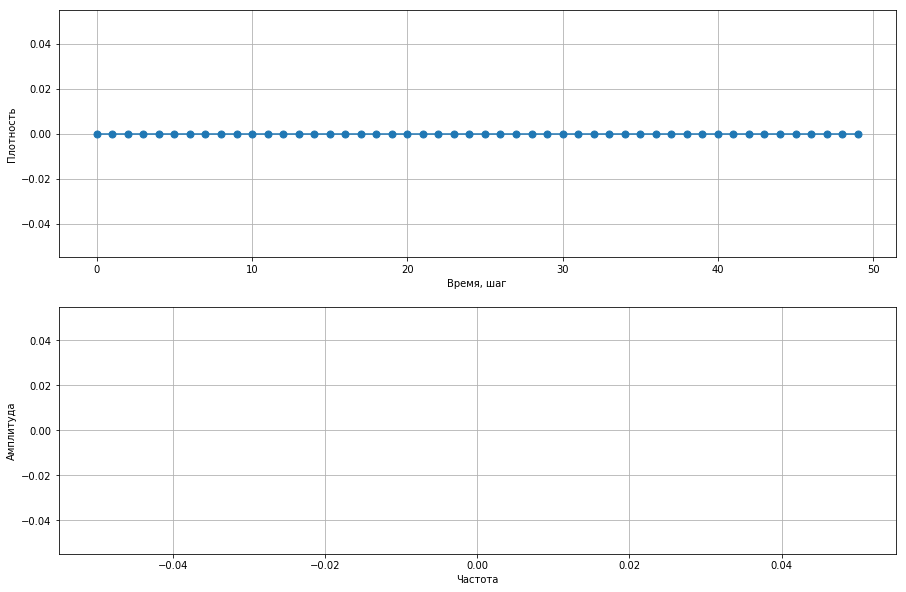

[]
*************
seed=12


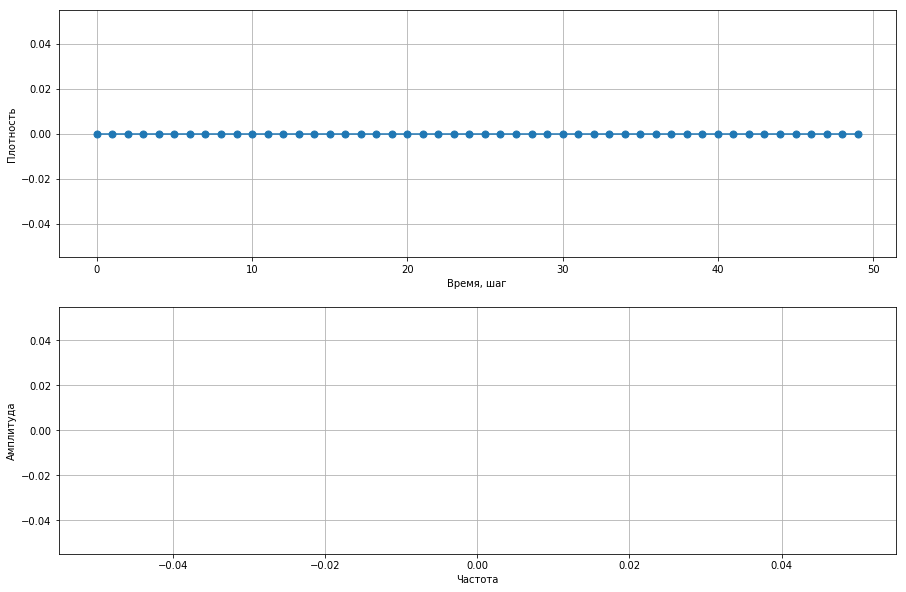

[]


In [23]:
print('seed=1')
fourier(seed1[6])
print('*************')
print('seed=4')
fourier(seed4[6])
print('*************')
print('seed=12')
fourier(seed12[6])

### b=7/3

seed=1


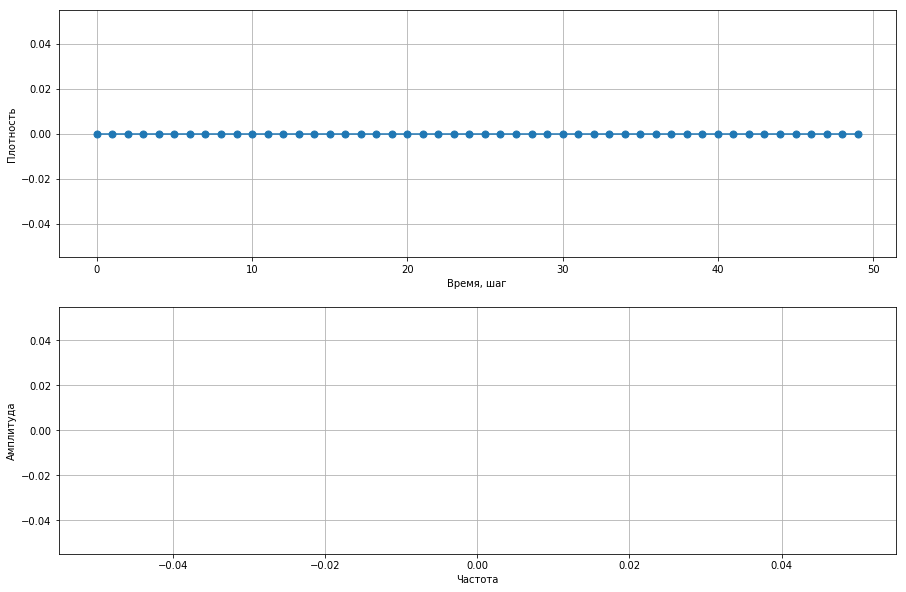

[]
*************
seed=4


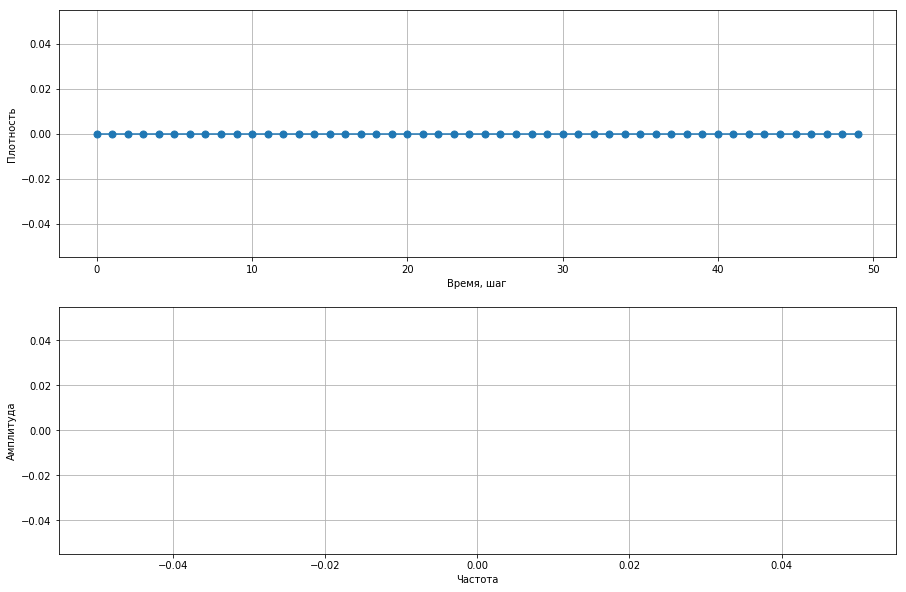

[]
*************
seed=12


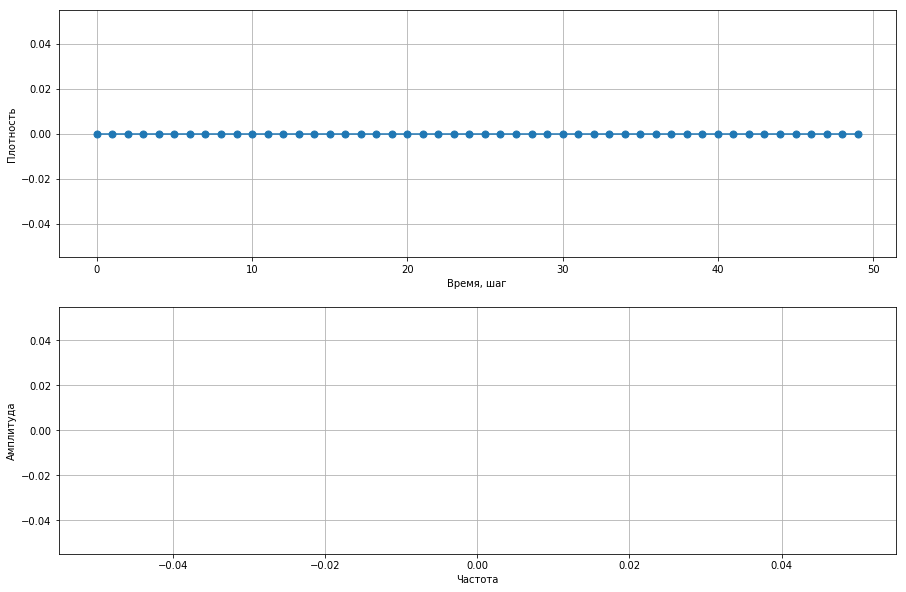

[]


In [24]:
print('seed=1')
fourier(seed1[7])
print('*************')
print('seed=4')
fourier(seed4[7])
print('*************')
print('seed=12')
fourier(seed12[7])

Вывод: для плотности при разных seed может быть разница как в значениях самой плотности, так и в количестве частот, полученных при анализе Фурье

## Разобраться с масштабами времен для режима (7/4, 2) на треугольной решетке: точно ли там уже достигнут steady state?

In [25]:
density1=c_density(size=33, percentage=70, burnin=5000)[5] #7/4
density2=c_density(size=33, percentage=70, burnin=5000)[6] #2

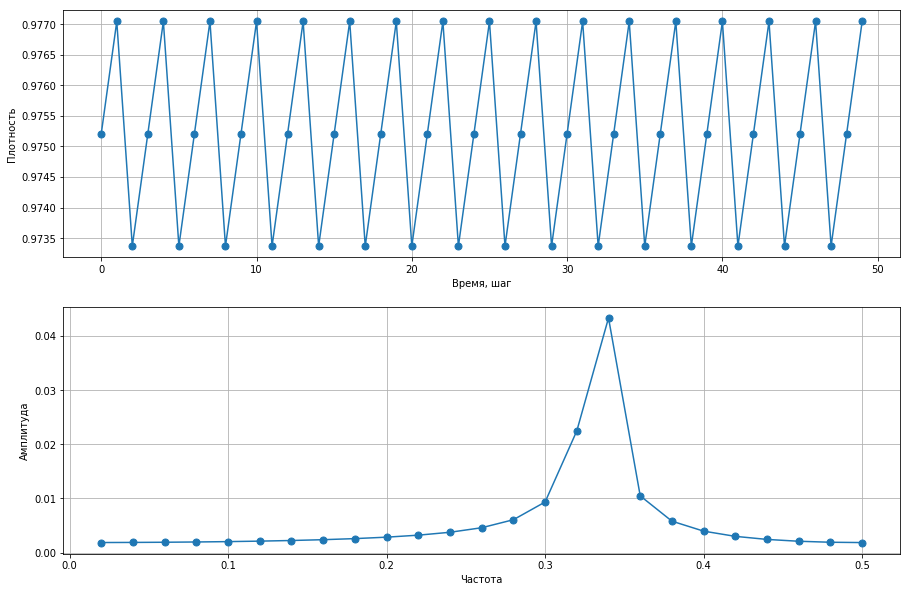

[0.00184301 0.00186269 0.00189644 0.00194581 0.0020132  0.00210223
 0.00221827 0.00236938 0.00256805 0.00283446 0.00320325 0.00373898
 0.00457695 0.00605586 0.00932821 0.0224646  0.04332075 0.01045971
 0.00578973 0.00394667 0.00298344 0.00241817 0.00207917 0.00189517
 0.00183655]


In [26]:
fourier(density1)

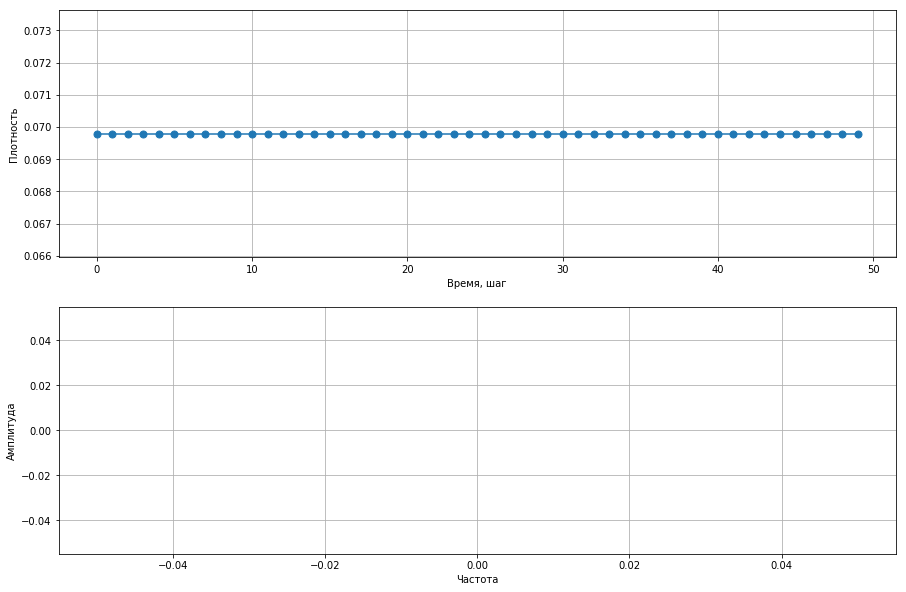

[]


In [27]:
fourier(density2)

density state достигается во втором случае

посмотрим, на каком именно шаге

In [28]:
alldensity2=c_density(size=33, percentage=70, burnin=0, evol=100)[6] #2

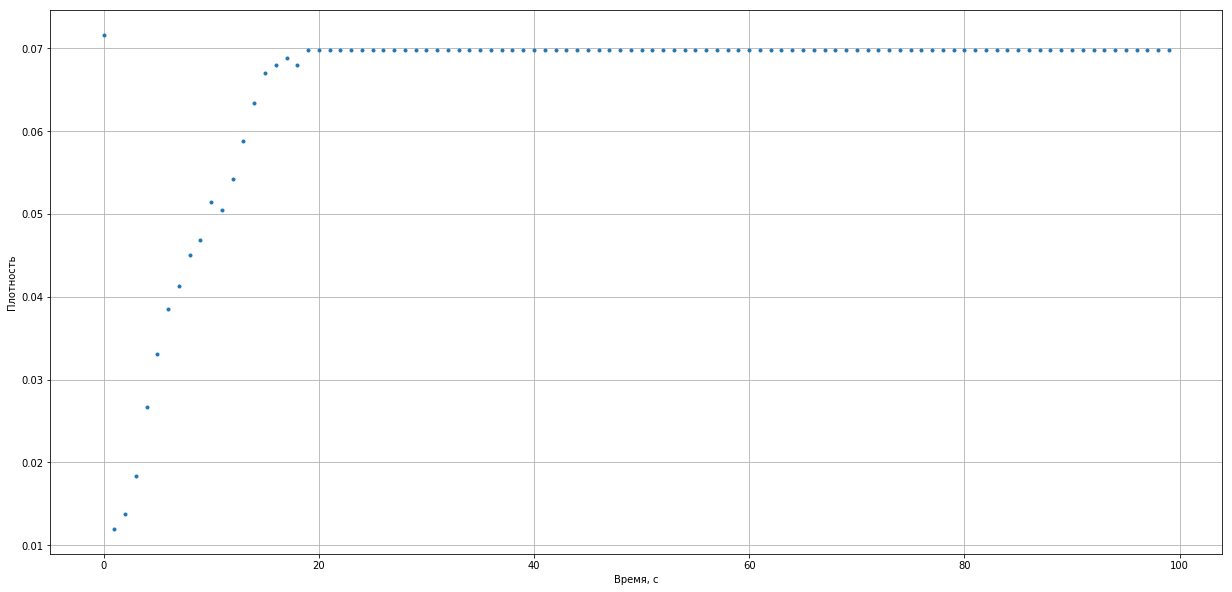

In [29]:
fig, ax = plt.subplots(figsize=(21,10))
    
ax.plot(alldensity2, '.')
ax.set_xlabel('Время, c')
ax.set_ylabel('Плотность')
ax.grid(True)